# *stats_util file beng added for stas tests*
`one_sample_ttest`: determine whether an unknown population mean is different from a specific value.

`two_sample_ttest`: test whether the unknown population means of two groups are equal.

`paired_ttest`: whether the mean difference between pairs of measurements is zero.

`chisquared_independence_test`: For categorical columns.

Each function here returns the test stats and a p-value.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import datetime as dt
# I added some hypothesis test code for convenience
import stats_utils as stats_utils

### Readin Full Dataset
The difference between full and cleaned dataset:
[cleaning code doc](file:///Users/linange/Downloads/Data-Science-4-All-Project/data/COVIDiSTRESS%20all%20global%20survey%20data./COVIDISTRESS%20data%20extraction%20%239%20(30%20May%202020)%20*COMPLETE%20DATASET*/May30%20cleaning%20notebook%20for%20dull%20dataset%20by%20Thao%20Tran.html#address_issues_with_different_languages)

In [2]:
# COVIDiSTRESS all global survey data./COVIDISTRESS data extraction #9 (30 May 2020) *COMPLETE DATASET*/
# COVIDiSTRESS global survey May 30 2020 (***final cleaned file***).csv
# I've changed the naming and move the file path for simplicity
# feel free to modify this if you need to import the data from your environment
data_dir = 'Data/'
file_name = 'final_data.csv'
cleaned_name = "COVIDiSTRESS_May_30_cleaned_final.csv"
df = pd.read_csv(data_dir+cleaned_name, encoding='latin1')
orig_data = df.copy(deep=True)
df = df.set_index('ID')
print(df.shape)
feature_names = list(df.columns)

# df.loc[ df['Country'] == 'United States', 'United States of America') => for mapping purpose
df['Country'].replace(['Bosnia and Herzegovina', 'Korea, South', 'United States'],
                           ['Bosnia and Herz.', 'South Korea', 'United States of America'],
                          inplace=True)

/home/ai/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (55,56,57,58,59,60,61) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


(125306, 153)


### Quantative of the features
For exact meanings, refer to the doc attached to the dataset.

In [3]:
import re

def match_feature_names(name_format):
    """ Use regex to match the prefix of feature names
    e.g. name_format = 'Corona_concerns'
    this function will return all features names starting with 'Corona_concerns_'
    """
    matched_ftrs = [ftr for ftr in categories if re.match(name_format+'*', ftr)]
    print("%d features starting with %s" % (len(matched_ftrs), name_format))
    return matched_ftrs

In [4]:
# ---------------- Renaming columns to understand context better or leave it? -------------
# ---------- I made new names for my understanding so I wont have to keep checking survey over and over --- 
rename_dict = {'Scale_PSS10_UCLA_1' : 'lw_upset_unexpected', 'Scale_PSS10_UCLA_2' : 'lw_nocontrol_imp',
              'Scale_PSS10_UCLA_3': 'nervous_stressed', 'Scale_PSS10_UCLA_4':'conf_control_personal_prob', 
              'Scale_PSS10_UCLA_5':'going_my_way', 'Scale_PSS10_UCLA_6':'cant_cope_todo', 
               'Scale_PSS10_UCLA_7':'control_irritants_life', 'Scale_PSS10_UCLA_8': 'top_of_things',
               'Scale_PSS10_UCLA_9':'anger_things_no_control',  'Scale_PSS10_UCLA_10':'piling_no_overcome', 
                'Scale_SLON_1':'lacked_companionship',  'Scale_SLON_2': 'left_out', 
                'Scale_SLON_3':'isolated', 'OECD_people_1': 'trust_allpeople', 'OECD_people_2':'trust_peopleyouknow',
              'OECD_insititutions_1': 'tr_govt','OECD_insititutions_2': 'tr_police','OECD_insititutions_3': 'tr_civil_serv',
               'OECD_insititutions_4': 'tr_health_sys','OECD_insititutions_5': 'tr_WHO', 'OECD_insititutions_6': \
               'tr_govt_effort_covid', 'Corona_concerns_1':'cov_concern_yourself','Corona_concerns_2':'cov_concern_fam',
               'Corona_concerns_3':'cov_concern_friends', 'Corona_concerns_4':'cov_concern_country',
               'Corona_concerns_5':'cov_concern_other_countries', 'Compliance_1': 'aware_covid_guide', 
               'Compliance_2': 'done_reduce_covid', 'Compliance_3': 'done_phy_distance',
       'Compliance_4':'phy_dist_high_personal_cost', 'Compliance_5':'trust_others_follow_guide', 'Compliance_6':
               'bought_extra_supplies','BFF_15_1':'nocov_often_concerned','BFF_15_2':'nocov_easily_nervous',
               'BFF_15_3':'nocov_good_cool_stresssful_situations','BFF_15_4':'nocov_likes_chat',
               'BFF_15_5':'nocov_extro_sociable', 'BFF_15_6':'nocov_reserved', 'BFF_15_7':'nocov_lots_ideas',
              'BFF_15_8':'nocov_appreciate_art','BFF_15_9':'nocov_imaginative', 'BFF_15_10':'nocov_sometimes_impolite',
              'BFF_15_11':'nocov_forgiving','BFF_15_12':'nocov_kind','BFF_15_13':'nocov_meticulous','BFF_15_14':'nocov_lazy',
              'BFF_15_15':'nocov_effective','Expl_Distress_1':'cur_distress_income', 'Expl_Distress_2':'cur_distress_work_perf',
               'Expl_Distress_3': 'cur_distress_child_education', 'Expl_Distress_4': 'cur_distress_future_job_prospects', 
               'Expl_Distress_5': 'cur_distress_access_necessities', 'Expl_Distress_6': 'cur_distress_miss_social_acts',
       'Expl_Distress_7': 'cur_distress_miss_religious_acts', 'Expl_Distress_8': 'cur_distress_behaviour_isolated_adults', 
               'Expl_Distress_9': 'cur_distress_behaviour_children_under_12','Expl_Distress_10': 'cur_distress_national_economy', 
               'Expl_Distress_11':'cur_distress_civil_services', 'Expl_Distress_12':'cur_distress_catching_covid',
       'Expl_Distress_13':'cur_distress_hosp_dying_covid', 'Expl_Distress_14':'cur_distress_worry_faraway_friendsfam', 
               'Expl_Distress_15':'cur_distress_work_adapt_digital','Expl_Distress_16': 'cur_distress_social_adapt_digital', 
               'Expl_Distress_17':'cur_distress_ashamed_behaviour_people_out', 'Expl_Distress_18':'cur_distress_loneliness',
       'Expl_Distress_19': 'cur_distress_time_spent_inside', 'Expl_Distress_20':'cur_distress_time_spent_close_others', 
               'Expl_Distress_21': 'cur_distress_no_know_covid_developments','Expl_Distress_22':'cur_distress_no_know_reduce_covid',
               'Expl_Distress_23':'cur_distress_no_know_how_long_measures_remain', 'Expl_Distress_24':'cur_distress_no_travel_intl',
             'SPS_1':'curr_have_ppl_depend_on', 'SPS_2':'curr_enjoy_same_social', 'SPS_3':'curr_part_group_share_beliefs',
               'SPS_4':'curr_relation_emotional_security', 'SPS_5':'curr_talk_important_things',
       'SPS_6':'curr_relationship_skills_recognized', 'SPS_7':'curr_trustworthy_adviser', 'SPS_8':'curr_close_bond', 
               'SPS_9':'curr_talents_admired', 'SPS_10':'curr_people_count_in_emergency', 
               'Expl_Coping_1':'helpful_govt_info',  'Expl_Coping_2':'helpful_face_interactions', 
               'Expl_Coping_3':'helpful_phonecalls_friends_fam', 'Expl_Coping_4':'helpful_interaction_colleages',
               'Expl_Coping_5': 'helpful_phonecalls_colleages', 'Expl_Coping_6': 'helpful_socialmedia', 
               'Expl_Coping_7':'helpful_videogames_alone', 'Expl_Coping_8': 'helpful_videogames_online',
               'Expl_Coping_9':'helpful_tv_movies', 'Expl_Coping_10': 'helpful_help_others',
               'Expl_Coping_11':'helpful_prepare_for_crisis', 'Expl_Coping_12': 'helpful_follow_govt_advice', 
               'Expl_Coping_13':'helpful_work_vocation','Expl_Coping_14':'helpful_act_hobby', 
               'Expl_Coping_15':'helpful_religion_spirituality', 'Expl_Coping_16':'helpful_knowledge_actions_by_govt_cs',
 }


# Converting datetimecolumn to filter out wrong dates----- 
if 'RecordedDate' in df.columns:
    df['RecordedDate'] = pd.to_datetime(df['RecordedDate'])
    
    a = df[df['RecordedDate'].dt.date < dt.date(2020,3,30)]  # Defined as invalid as it starts before survey
    records_remove = a[~a['Country'].isin(['Denmark', 'Kosovo'])]
    ids_remove = records_remove.index
    if len(ids_remove) != 0:
        df.drop(ids_remove, axis=1, inplace=True)

#-------------------- We don't care about the following columns, so removing them -----------
columns_to_remove = ['Expl_Distress_txt', 'Dem_edu_mom', 'Dem_state', 'Dem_isolation_kids', 'Dem_isolation',
    'Dem_isolation_adults', 'Dem_Expat', 'AD_loss', 'AD_gain', 'AD_check', 'Final_open','Trust_countrymeasure', 
        'Compliance_1', 'Compliance_2', 'Compliance_3', 'Compliance_4',
       'Compliance_5', 'Compliance_6', 'born_92', 'experience_war', 'experience_war_TXT', 'war_injury', 
       'loss_during_war', 'time_spent_in_war', 'time_spent_in_war_TXT','Expl_coping_txt', 'Scale_UCLA_TRI_1', 
        'Scale_UCLA_TRI_2','Scale_UCLA_TRI_3', 'Scale_UCLA_TRI_4',  'PS_PTSD_1', 'PS_PTSD_2', 'PS_PTSD_3', 
        'PS_PTSD_4', 'PS_PTSD_5', 'Expl_media_1', 'Expl_media_2', 'Expl_media_3', 'Expl_media_4','Expl_media_5',
        'Expl_media_6', 'Final_open', 'PSS10_avg', 'SLON3_avg', 'neu', 'ext', 'ope', 'agr', 'con', 'SPS_avg', 
        'Scale_UCLA_TRI_avg','OECD_people_1', 'OECD_people_2', 'OECD_insititutions_1', 'OECD_insititutions_2', 
              'OECD_insititutions_3', 'OECD_insititutions_4', 'OECD_insititutions_5', 'OECD_insititutions_6', 
        'answered_all', 'Duration..in.seconds.', 'RecordedDate', 'UserLanguage', 'Scale_SLON_1', 'Scale_SLON_2', 
             'Scale_SLON_3', 'BFF_15_3', 'BFF_15_4', 'BFF_15_5', 'BFF_15_6', 'BFF_15_7', 'BFF_15_8', 'BFF_15_9',
            'BFF_15_10', 'BFF_15_11', 'BFF_15_12', 'BFF_15_13', 'BFF_15_14', 'BFF_15_15']

try:
    print("Removed",len(columns_to_remove))
    df.drop(columns_to_remove, axis=1, inplace=True)
    print('new_shape:', df.shape)
except:
    print("Already removed; new shape", df.shape)


Removed 79
new_shape: (125306, 75)


### Missing values
Removing columns that have too few values

In [5]:
print('data dimensions:', df.shape)
perc_missing_per_ftr = df.isnull().sum(axis=0)/df.shape[0]
# perc_missing_per_ftr[perc_missing_per_ftr > 0].sort_values()

data dimensions: (125306, 75)


In [6]:
# ----- showing the nullness of the dataframe and deleting rows with more than 80% null

show_hmaps = False

if show_hmaps:
    ig, (ax1, ax2) = plt.subplots(1,2)
    sns.heatmap(df.isnull(), cbar=False, cmap='viridis', ax=ax1)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
perc_missing_per_row = df.isna().sum(axis=1)/df.shape[1]
perc_missing_per_row
ser_small = perc_missing_per_row[perc_missing_per_row > 0.8].sort_values()
to_delete_rows = ser_small.index.tolist()
df.drop(to_delete_rows, inplace=True)

if show_hmaps:
    sns.heatmap(df.isnull(), cbar=False, cmap='viridis', ax=ax2)
    plt.show()



# **Incorrect Values**

In [7]:
# In all the following columns, there were many 99.0 in the dataset. Replacing them with Nans
cols = ['Expl_Distress_1', 'Expl_Distress_2', 'Expl_Distress_3',
       'Expl_Distress_4', 'Expl_Distress_5', 'Expl_Distress_6',
       'Expl_Distress_7', 'Expl_Distress_8', 'Expl_Distress_9',
       'Expl_Distress_10', 'Expl_Distress_11', 'Expl_Distress_12',
       'Expl_Distress_13', 'Expl_Distress_14', 'Expl_Distress_15',
       'Expl_Distress_16', 'Expl_Distress_17', 'Expl_Distress_18',
       'Expl_Distress_19', 'Expl_Distress_20', 'Expl_Distress_21',
       'Expl_Distress_22', 'Expl_Distress_23', 'Expl_Distress_24']

for col in cols:
    df[col].replace({99: np.nan}, inplace=True)
    

## **Analyzing patterns in data to join columns**

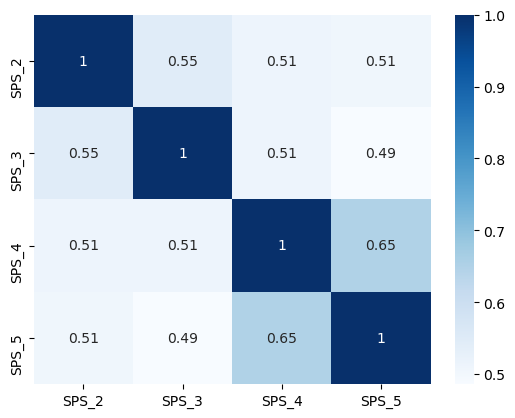

In [8]:
#-------------------------- checking correlations----------------
#------- Doing this before turning likert scale values to categories ---------
#-------- FIguring out which columns I can join to reduce the number of columns ---------------
visualize = True
v = ['Scale_PSS10_UCLA_1','Scale_PSS10_UCLA_2', 'Scale_PSS10_UCLA_3', 'Scale_PSS10_UCLA_4', 'Scale_PSS10_UCLA_5', \
   'Scale_PSS10_UCLA_6', 'Scale_PSS10_UCLA_7', 'Scale_PSS10_UCLA_8', 'Scale_PSS10_UCLA_9', 'Scale_PSS10_UCLA_10']

cc = [ 'Corona_concerns_1', 'Corona_concerns_2', 'Corona_concerns_3', 'Corona_concerns_4', 'Corona_concerns_5']

ed = ['Expl_Distress_1', 'Expl_Distress_2','Expl_Distress_3', 'Expl_Distress_4','Expl_Distress_5', 'Expl_Distress_6','Expl_Distress_7', 'Expl_Distress_8',
              'Expl_Distress_9', 'Expl_Distress_10','Expl_Distress_11', 'Expl_Distress_12','Expl_Distress_13', 
              'Expl_Distress_14', 'Expl_Distress_15', 'Expl_Distress_16','Expl_Distress_17', 'Expl_Distress_18',
              'Expl_Distress_19', 'Expl_Distress_20','Expl_Distress_21', 'Expl_Distress_22', 'Expl_Distress_23',
             'Expl_Distress_24']

sps = ['SPS_1', 'SPS_2', 'SPS_3', 'SPS_4', 'SPS_5','SPS_6', 'SPS_7', 'SPS_8', 'SPS_9', 'SPS_10', ]
ec =['Expl_Coping_1',  'Expl_Coping_2','Expl_Coping_3', 'Expl_Coping_4','Expl_Coping_5',
              'Expl_Coping_6','Expl_Coping_7', 'Expl_Coping_8','Expl_Coping_9', 'Expl_Coping_10','Expl_Coping_11',
              'Expl_Coping_12','Expl_Coping_13','Expl_Coping_14', 'Expl_Coping_15', 'Expl_Coping_16']

pc_data = ['BFF_15_1', 'BFF_15_2', 'BFF_15_3', 'BFF_15_4',
       'BFF_15_5', 'BFF_15_6', 'BFF_15_7', 'BFF_15_8', 'BFF_15_9', 'BFF_15_10',
       'BFF_15_11', 'BFF_15_12', 'BFF_15_13', 'BFF_15_14', 'BFF_15_15']

if visualize == True:
#     plt.figure(figsize=(30, 30))
    sns.heatmap(df[sps[1:5]].corr(), cbar=True,annot=True, cmap='Blues')
    plt.show()


### Feature Engineering

In [9]:
# Joining columns for analysis for Scale_PSS10_UCLA 
# In the last week, how often have you...
# col1 = felt bad =  1,2,3,6, 9,10; col2 = felt good/confident incontrol = 4,5,7,8
print(df.shape)


g1 = ['Scale_PSS10_UCLA_1', 'Scale_PSS10_UCLA_2', 'Scale_PSS10_UCLA_3','Scale_PSS10_UCLA_6', \
      'Scale_PSS10_UCLA_9','Scale_PSS10_UCLA_10']
g2 = ['Scale_PSS10_UCLA_4', 'Scale_PSS10_UCLA_5', 'Scale_PSS10_UCLA_7','Scale_PSS10_UCLA_8']


if all(col in df.columns for col in g1):
#     print(all(col in df.columns for col in g1))
    df['lw_bad_feelings'] = df[g1].mean(axis=1)
    df.drop(g1, axis=1, inplace=True)
    
if all(col in df.columns for col in g2):
    df['lw_good_feelings'] = df[g2].mean(axis=1)
    df.drop(g2, axis=1, inplace=True)
df.shape


(115826, 75)


(115826, 67)

In [10]:
# Joining columns for analysis for Corona concerns
# How much do you agree, that you are you concerned about the consequences of the Coronavirus ...
# col1 = yourself, fam, friends =  1,2,3, col2 = country, all countries= 4,5
print(df.shape)
g1 = ['Corona_concerns_1', 'Corona_concerns_2', 'Corona_concerns_3']
g2 = ['Corona_concerns_4', 'Corona_concerns_5']


if all(col in df.columns for col in g1):
    df['cc_yff'] = df[g1].mean(axis=1)
    df.drop(g1, axis=1, inplace=True)
    
if all(col in df.columns for col in g2):
    df['cc_countries'] = df[g2].mean(axis=1)
    df.drop(g2, axis=1, inplace=True)
df.shape


(115826, 67)


(115826, 64)

In [11]:
# Joining columns for analysis for SPS
# In your current day to day life, to what degree do you agree with the following?
#
# group1: 1.4.5.7.8.10: 
#     • There are people I can depend on to help me if I really need it. 
#     • I have close relationships that provide me with a sense of emotional security and well-being. 
#     • There are people I can count on in an emergency. 
#     • There is a trustworthy person I could turn to for advice if I were having problems
#     • There is someone I could talk to about important decisions in my life. 
#     • I feel a strong emotional bond with at least one other person
# group 2: 6.9. 
#     • I have relationships where my competence and skills are recognized
#     • There are people who admire my talents and abilities.
# 2: There are people who enjoy the same social activities I do. 
# 3: I feel part of a group of people who share my attitudes and beliefs.

print(df.shape)
g1 = ['SPS_1', 'SPS_4', 'SPS_5', 'SPS_7', 'SPS_8','SPS_10']
g2 = ['SPS_6', 'SPS_9']
g3 = 'SPS_2'
g4 = 'SPS_3'



if all(col in df.columns for col in g1):
    df['current_people_around'] = df[g1].mean(axis=1)
    df.drop(g1, axis=1, inplace=True)
    
if all(col in df.columns for col in g2):
    df['current_skills_talents_appreciated'] = df[g2].mean(axis=1)
    df.drop(g2, axis=1, inplace=True)
    
if g3 in df.columns:
    df.rename(columns={g3: "current_same_social"}, inplace=True)

if g4 in df.columns:
    df.rename(columns={g4: "current_same_atts&beliefs"}, inplace=True)
   
df.shape


(115826, 64)


(115826, 58)

In [12]:
# BFF_15 block data: Precovid:
# using first two columns to establish baseline stress pre covid
# columns include: "... is often concerned" & "... easily gets nervous"
# will be called baseline

columns_interest = ['BFF_15_1', 'BFF_15_2']
if 'BFF_15_1' in df.columns and 'BFF_15_2' in df.columns:
    df['baseline'] = df[columns_interest].mean(axis=1)
    df.drop(columns_interest, axis=1, inplace=True)
#Data here should be 115826, 57 shape

## Visualization

*Visualizing the features' distribution*

In [13]:
df_male = df[df['Dem_gender'] == 'Male']
df_female = df[df['Dem_gender'] == 'Female']
df_other = df[(df['Dem_gender'] != 'Female') & (df['Dem_gender'] == 'Male')]

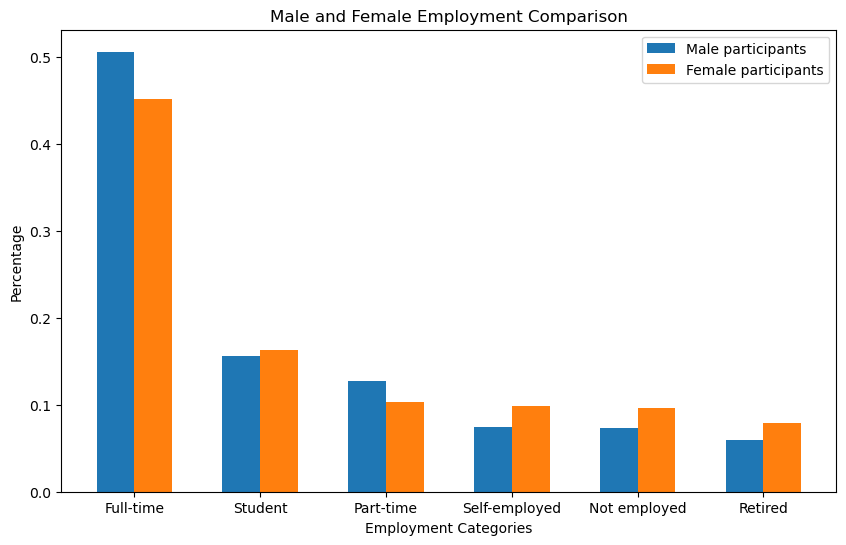

In [14]:
# ------------------------ Compare employment between women and men ------------------------
x = np.arange(6)
emp_women = df_female['Dem_employment'].value_counts().to_list()
emp_men = df_male['Dem_employment'].value_counts().to_list()
width = 0.3

plt.figure(figsize=(10, 6))
# you can change the following two lines for counts instead of percentage
plt.bar(x-0.15, [i / df_male.shape[0] for i in emp_men], width)
plt.bar(x+0.15, [i / df_female.shape[0] for i in emp_women], width)

plt.xticks(x, ["Full-time", "Student", "Part-time", "Self-employed", "Not employed", "Retired"])
plt.title("Male and Female Employment Comparison")
# plt.xticks(rotation=20)
plt.xlabel("Employment Categories")
plt.ylabel("Percentage")
plt.legend(["Male participants", "Female participants"])
plt.show()

In [15]:
try: 
    import geopandas
    import mapclassify
except:
    !pip3 install geopandas
    !pip3 install mapclassify

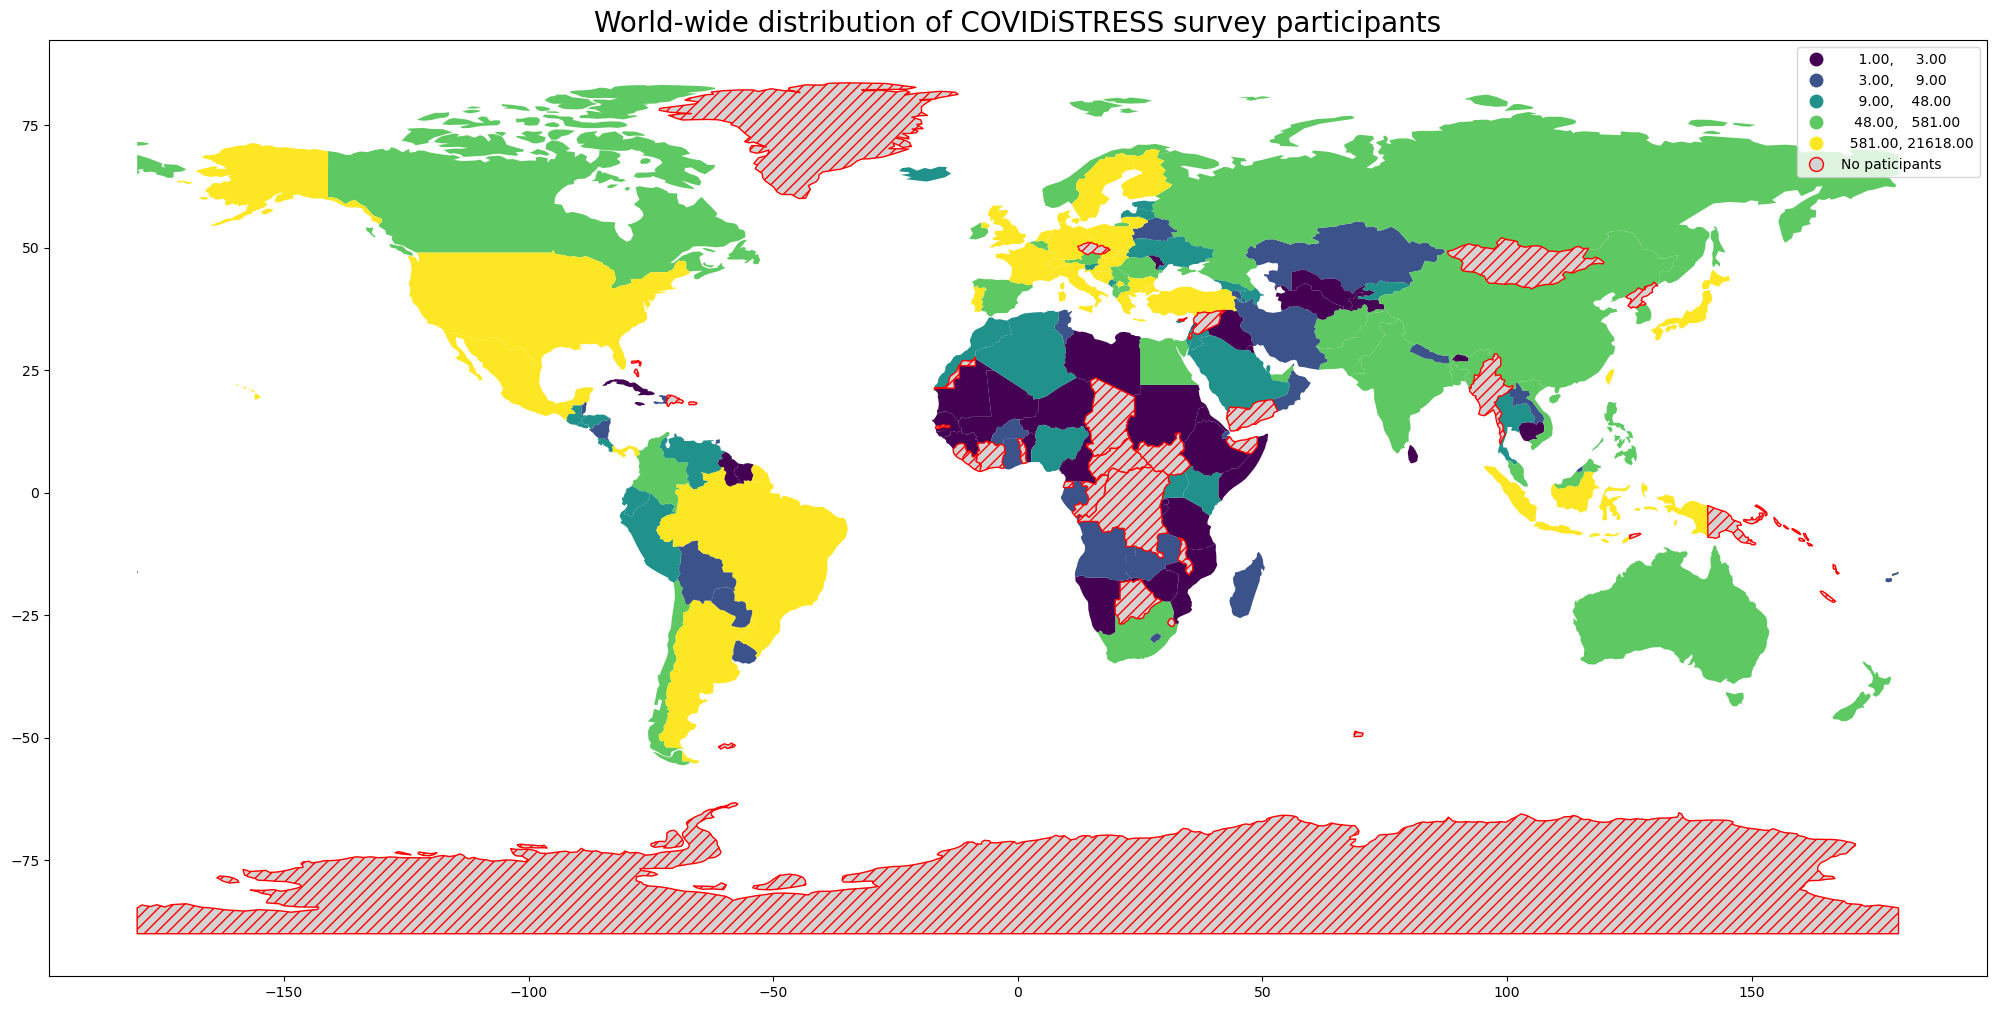

In [16]:
least_num = 0

# ------------------ Draw Geographic maps to show country distributions ------------------------
df_country = df.groupby('Country').count().reset_index().rename(columns={'Country': 'name', 'Dem_age': 'count'})[['name', 'count']]
df_country['name'].replace(['Bosnia and Herzegovina', 'Korea, South', 'United States'],
                           ['Bosnia and Herz.', 'South Korea', 'United States of America'],
                          inplace=True)

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world.columns=['pop_est', 'continent', 'name', 'CODE', 'gdp_md_est', 'geometry']

merge=pd.merge(world, df_country, on='name', how='left')
merge['count'].mask(merge['count'] < least_num, inplace=True)

location=pd.read_csv('https://raw.githubusercontent.com/melanieshi0120/COVID-19_global_time_series_panel_data/master/data/countries_latitude_longitude.csv')
# merge=merge.merge(location,on='name').sort_values(by='count',ascending=False).reset_index()
merge.plot(column='count', 
           scheme="quantiles",
           figsize=(25, 20),
           legend=True,
                missing_kwds={
        "color": "lightgrey",
        "edgecolor": "red",
        "hatch": "///",
        "label": "No paticipants",
    })
plt.title("World-wide distribution of COVIDiSTRESS survey participants", fontsize=20)
plt.show()

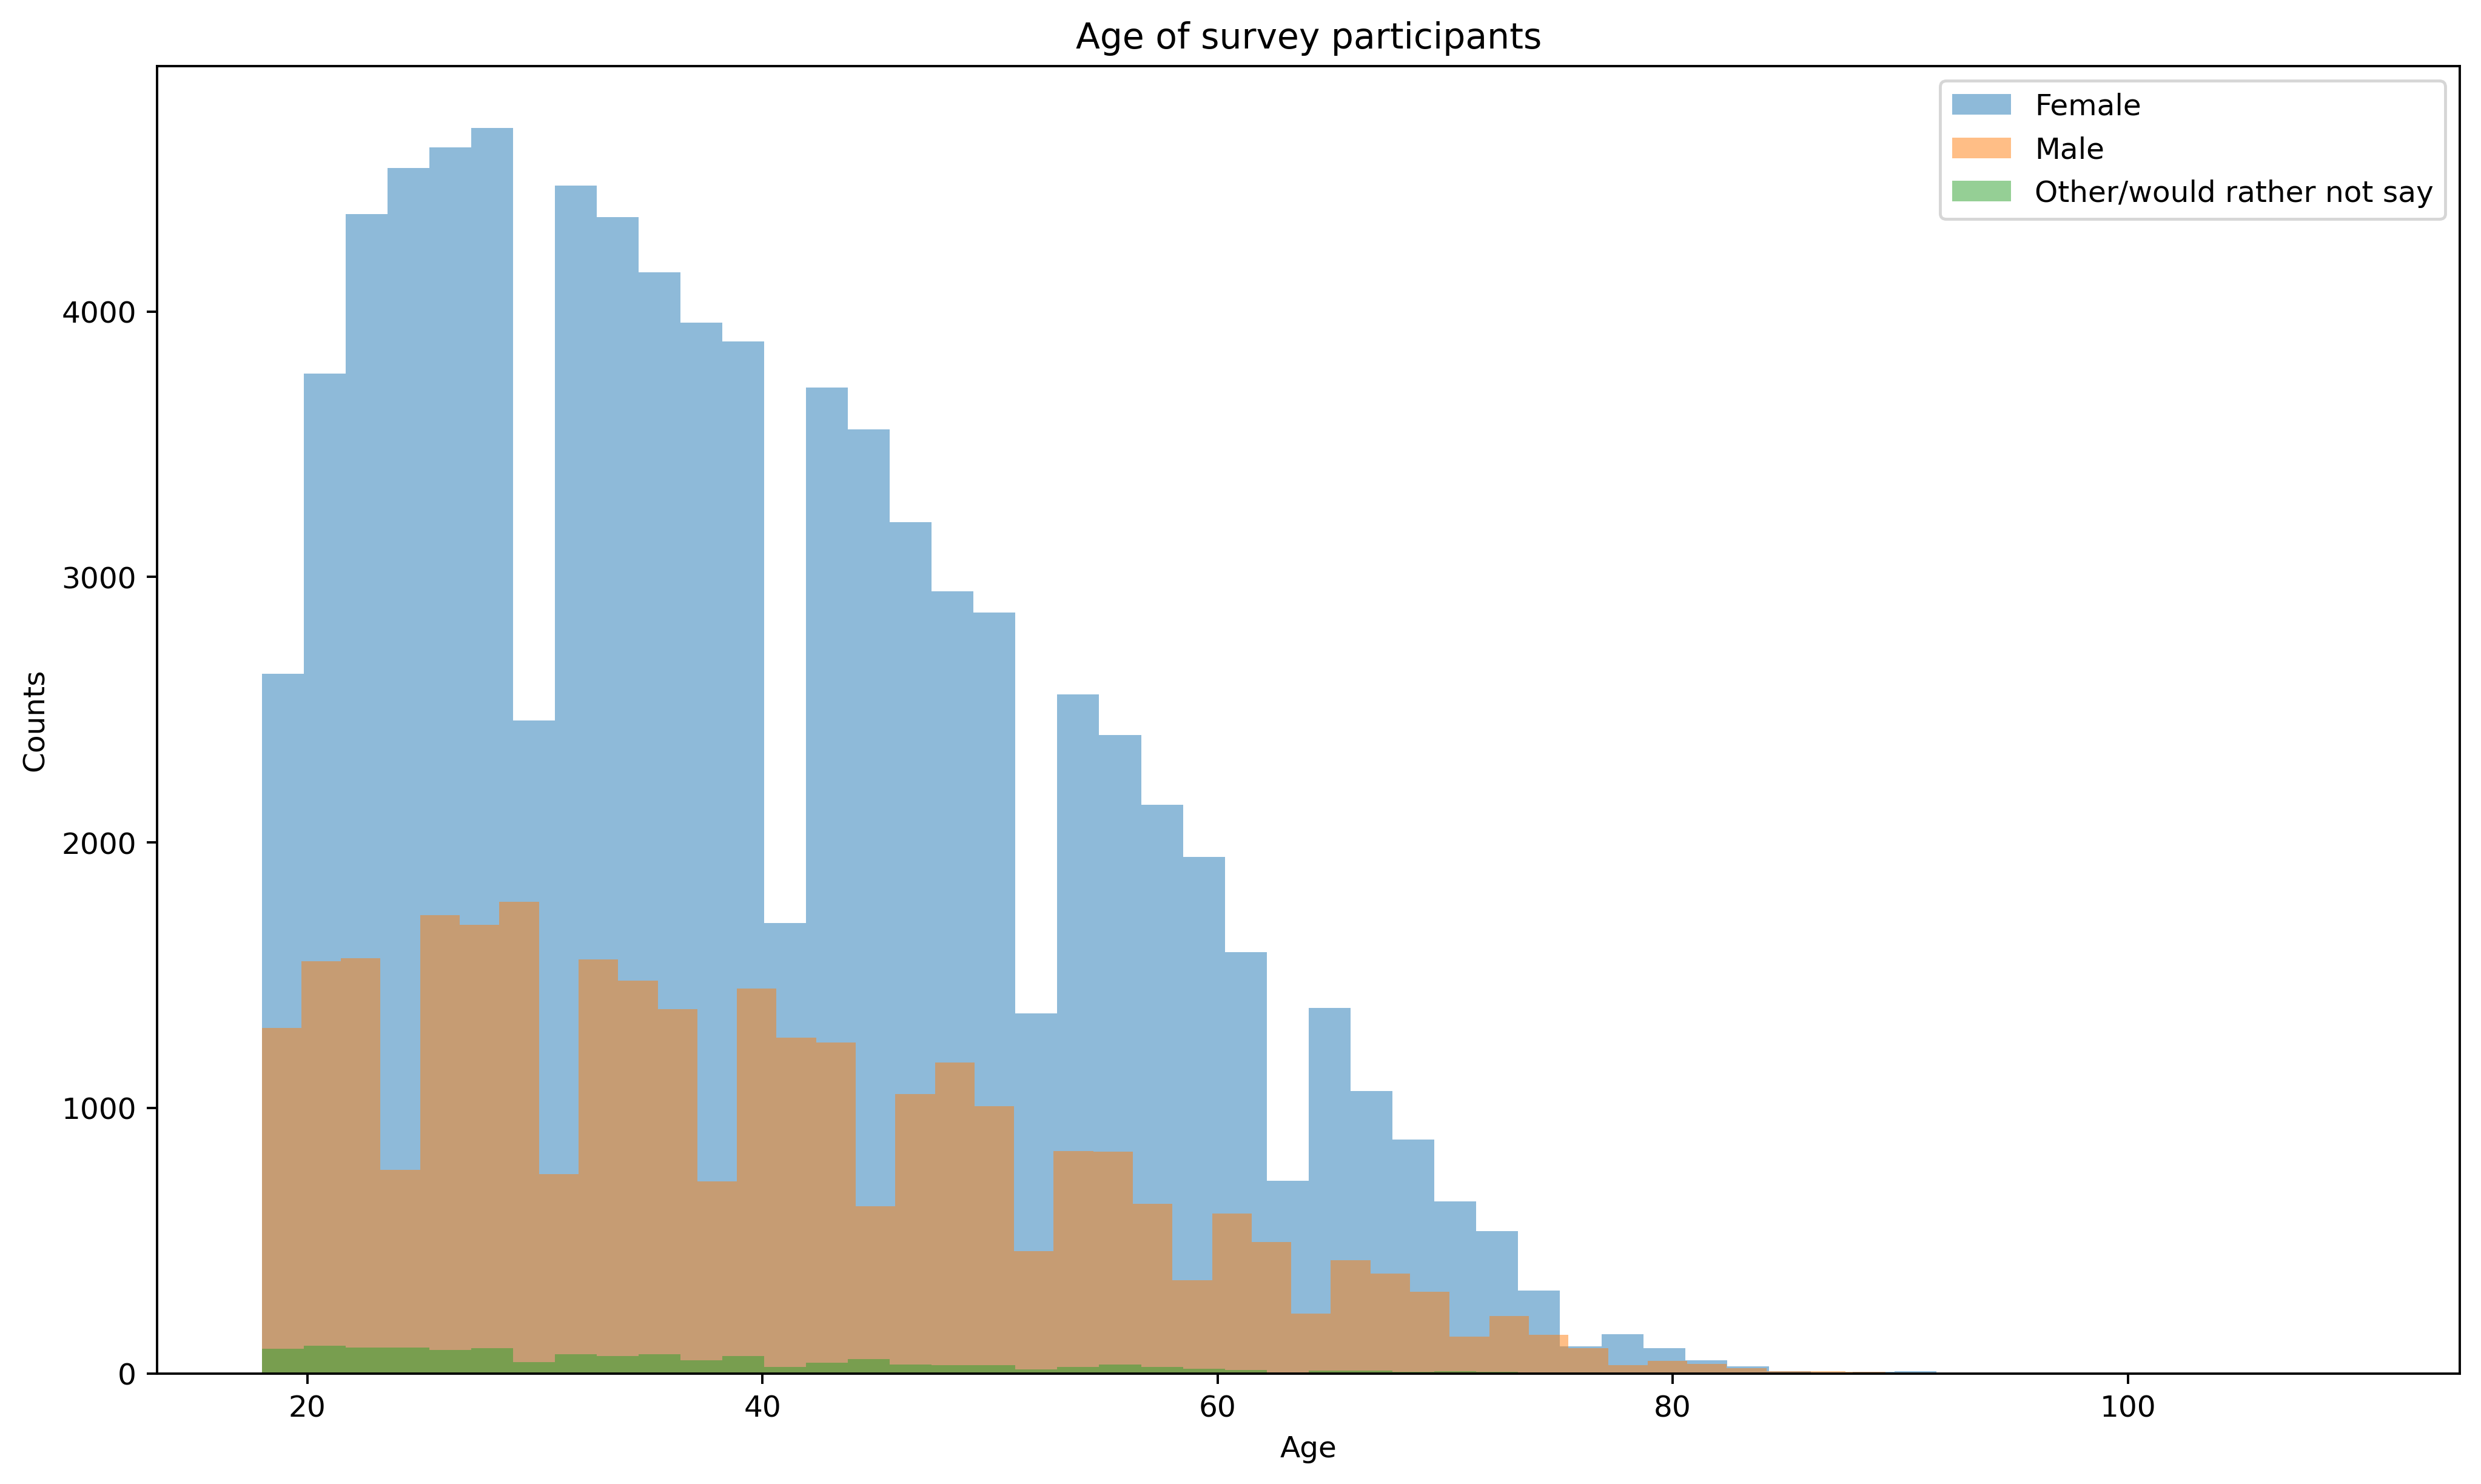

In [17]:
# ---------------- Show the distribution of age --------
df_age_by_gender = df.groupby("Dem_gender")

fig, ax = plt.subplots(1,1,figsize=(14, 8), dpi=350)
for key, grp in df_age_by_gender: 
#     grp = grp.groupby('Dem_age').count().reset_index()\
#                .rename(columns={'answered_all': 'count'})
    plt.hist(grp['Dem_age'], bins=50, alpha=0.5, label=key)

plt.xlabel("Age")
plt.ylabel("Counts")
plt.title("Age of survey participants")
plt.legend()
plt.show()

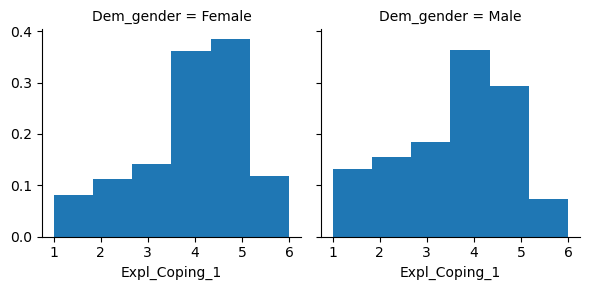

In [18]:
#--- Using facetgrid to divid data by gender for Expl_coping 1 for counts ----
# g = sns.FacetGrid(data=df[(df['Dem_gender'] == 'Female') | (df['Dem_gender'] == 'Male')],
#                   col='Dem_gender')
# g.map(sns.histplot, 'Expl_Coping_1', bins=6)
# plt.show()
#'Expl_Coping_1' == worries related to job/income
#--- Using facetgrid to divid data by gender for Expl_coping 1 percent ----
g = sns.FacetGrid(data=df[(df['Dem_gender'] == 'Female') | (df['Dem_gender'] == 'Male')],
                  col='Dem_gender')
g.map(plt.hist, 'Expl_Coping_1', bins=6, density=True)
plt.show()

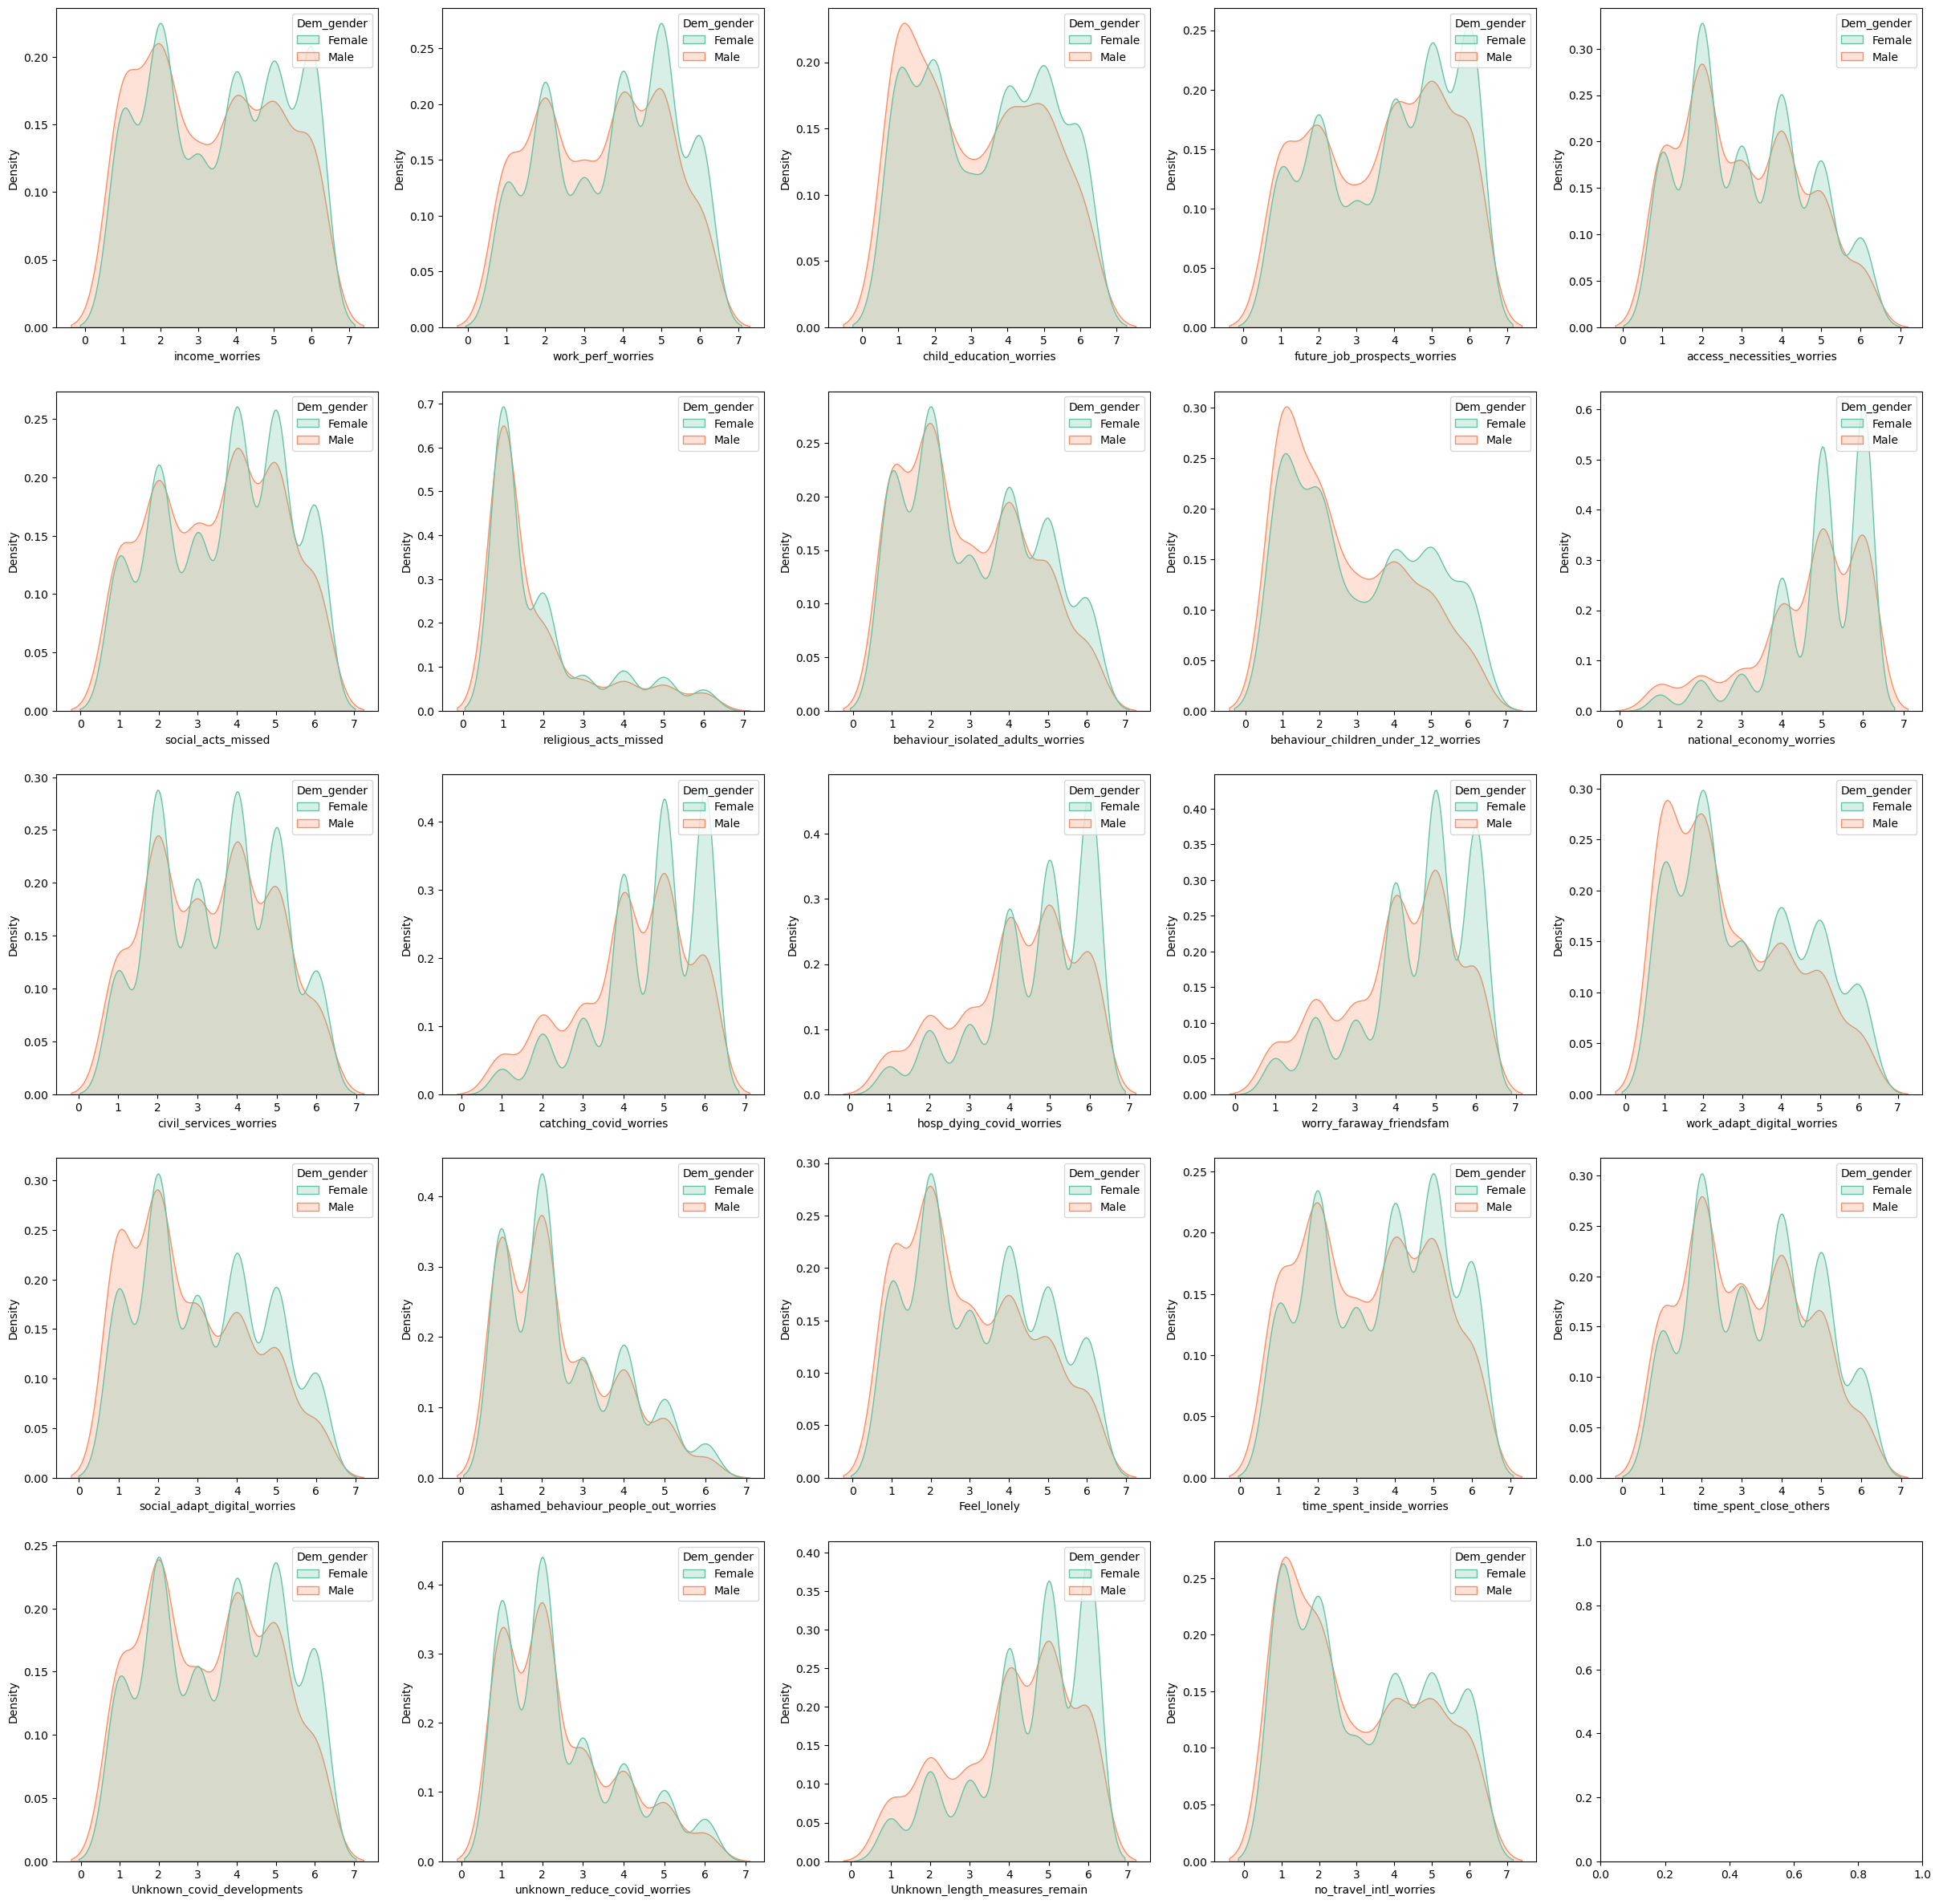

In [19]:
#----- looking at all the expl_distress by gender -----

import math

rename_dict = {'Expl_Distress_1':'income_worries', 'Expl_Distress_2':'work_perf_worries',
        'Expl_Distress_3': 'child_education_worries', 'Expl_Distress_4': 'future_job_prospects_worries', 
        'Expl_Distress_5': 'access_necessities_worries', 'Expl_Distress_6': 'social_acts_missed',
        'Expl_Distress_7': 'religious_acts_missed', 'Expl_Distress_8': 'behaviour_isolated_adults_worries', 
        'Expl_Distress_9': 'behaviour_children_under_12_worries','Expl_Distress_10': 'national_economy_worries', 
        'Expl_Distress_11':'civil_services_worries', 'Expl_Distress_12':'catching_covid_worries',
        'Expl_Distress_13':'hosp_dying_covid_worries', 'Expl_Distress_14':'worry_faraway_friendsfam', 
        'Expl_Distress_15':'work_adapt_digital_worries','Expl_Distress_16': 'social_adapt_digital_worries', 
        'Expl_Distress_17': 'ashamed_behaviour_people_out_worries', 'Expl_Distress_18':'Feel_lonely',
        'Expl_Distress_19': 'time_spent_inside_worries', 'Expl_Distress_20':'time_spent_close_others', 
        'Expl_Distress_21': 'Unknown_covid_developments','Expl_Distress_22':'unknown_reduce_covid_worries',
        'Expl_Distress_23':'Unknown_length_measures_remain', 'Expl_Distress_24':'no_travel_intl_worries'}

df2 = df.loc[:,['Dem_gender','Expl_Distress_1', 'Expl_Distress_2', 'Expl_Distress_3',
       'Expl_Distress_4', 'Expl_Distress_5', 'Expl_Distress_6',
       'Expl_Distress_7', 'Expl_Distress_8', 'Expl_Distress_9',
       'Expl_Distress_10', 'Expl_Distress_11', 'Expl_Distress_12',
       'Expl_Distress_13', 'Expl_Distress_14', 'Expl_Distress_15',
       'Expl_Distress_16', 'Expl_Distress_17', 'Expl_Distress_18',
       'Expl_Distress_19', 'Expl_Distress_20', 'Expl_Distress_21',
       'Expl_Distress_22', 'Expl_Distress_23', 'Expl_Distress_24']]


fig, axis = plt.subplots(5,5, figsize=(30,30))


for i in range(0,24):
    col = 'Expl_Distress_' + str(i+1)
    ax=[math.floor(i/5), i%5]
#     print(ax)
    sns.kdeplot(data=df2[(df2['Dem_gender'] == 'Female') | (df2['Dem_gender'] == 'Male')],
            hue='Dem_gender', x=col,
            fill=True, bw_adjust=2,
            palette = "Set2", common_norm=False, ax=axis[math.floor(i/5), i%5])
    axis[math.floor(i/5), i%5].set_xlabel(rename_dict[col])

plt.show()


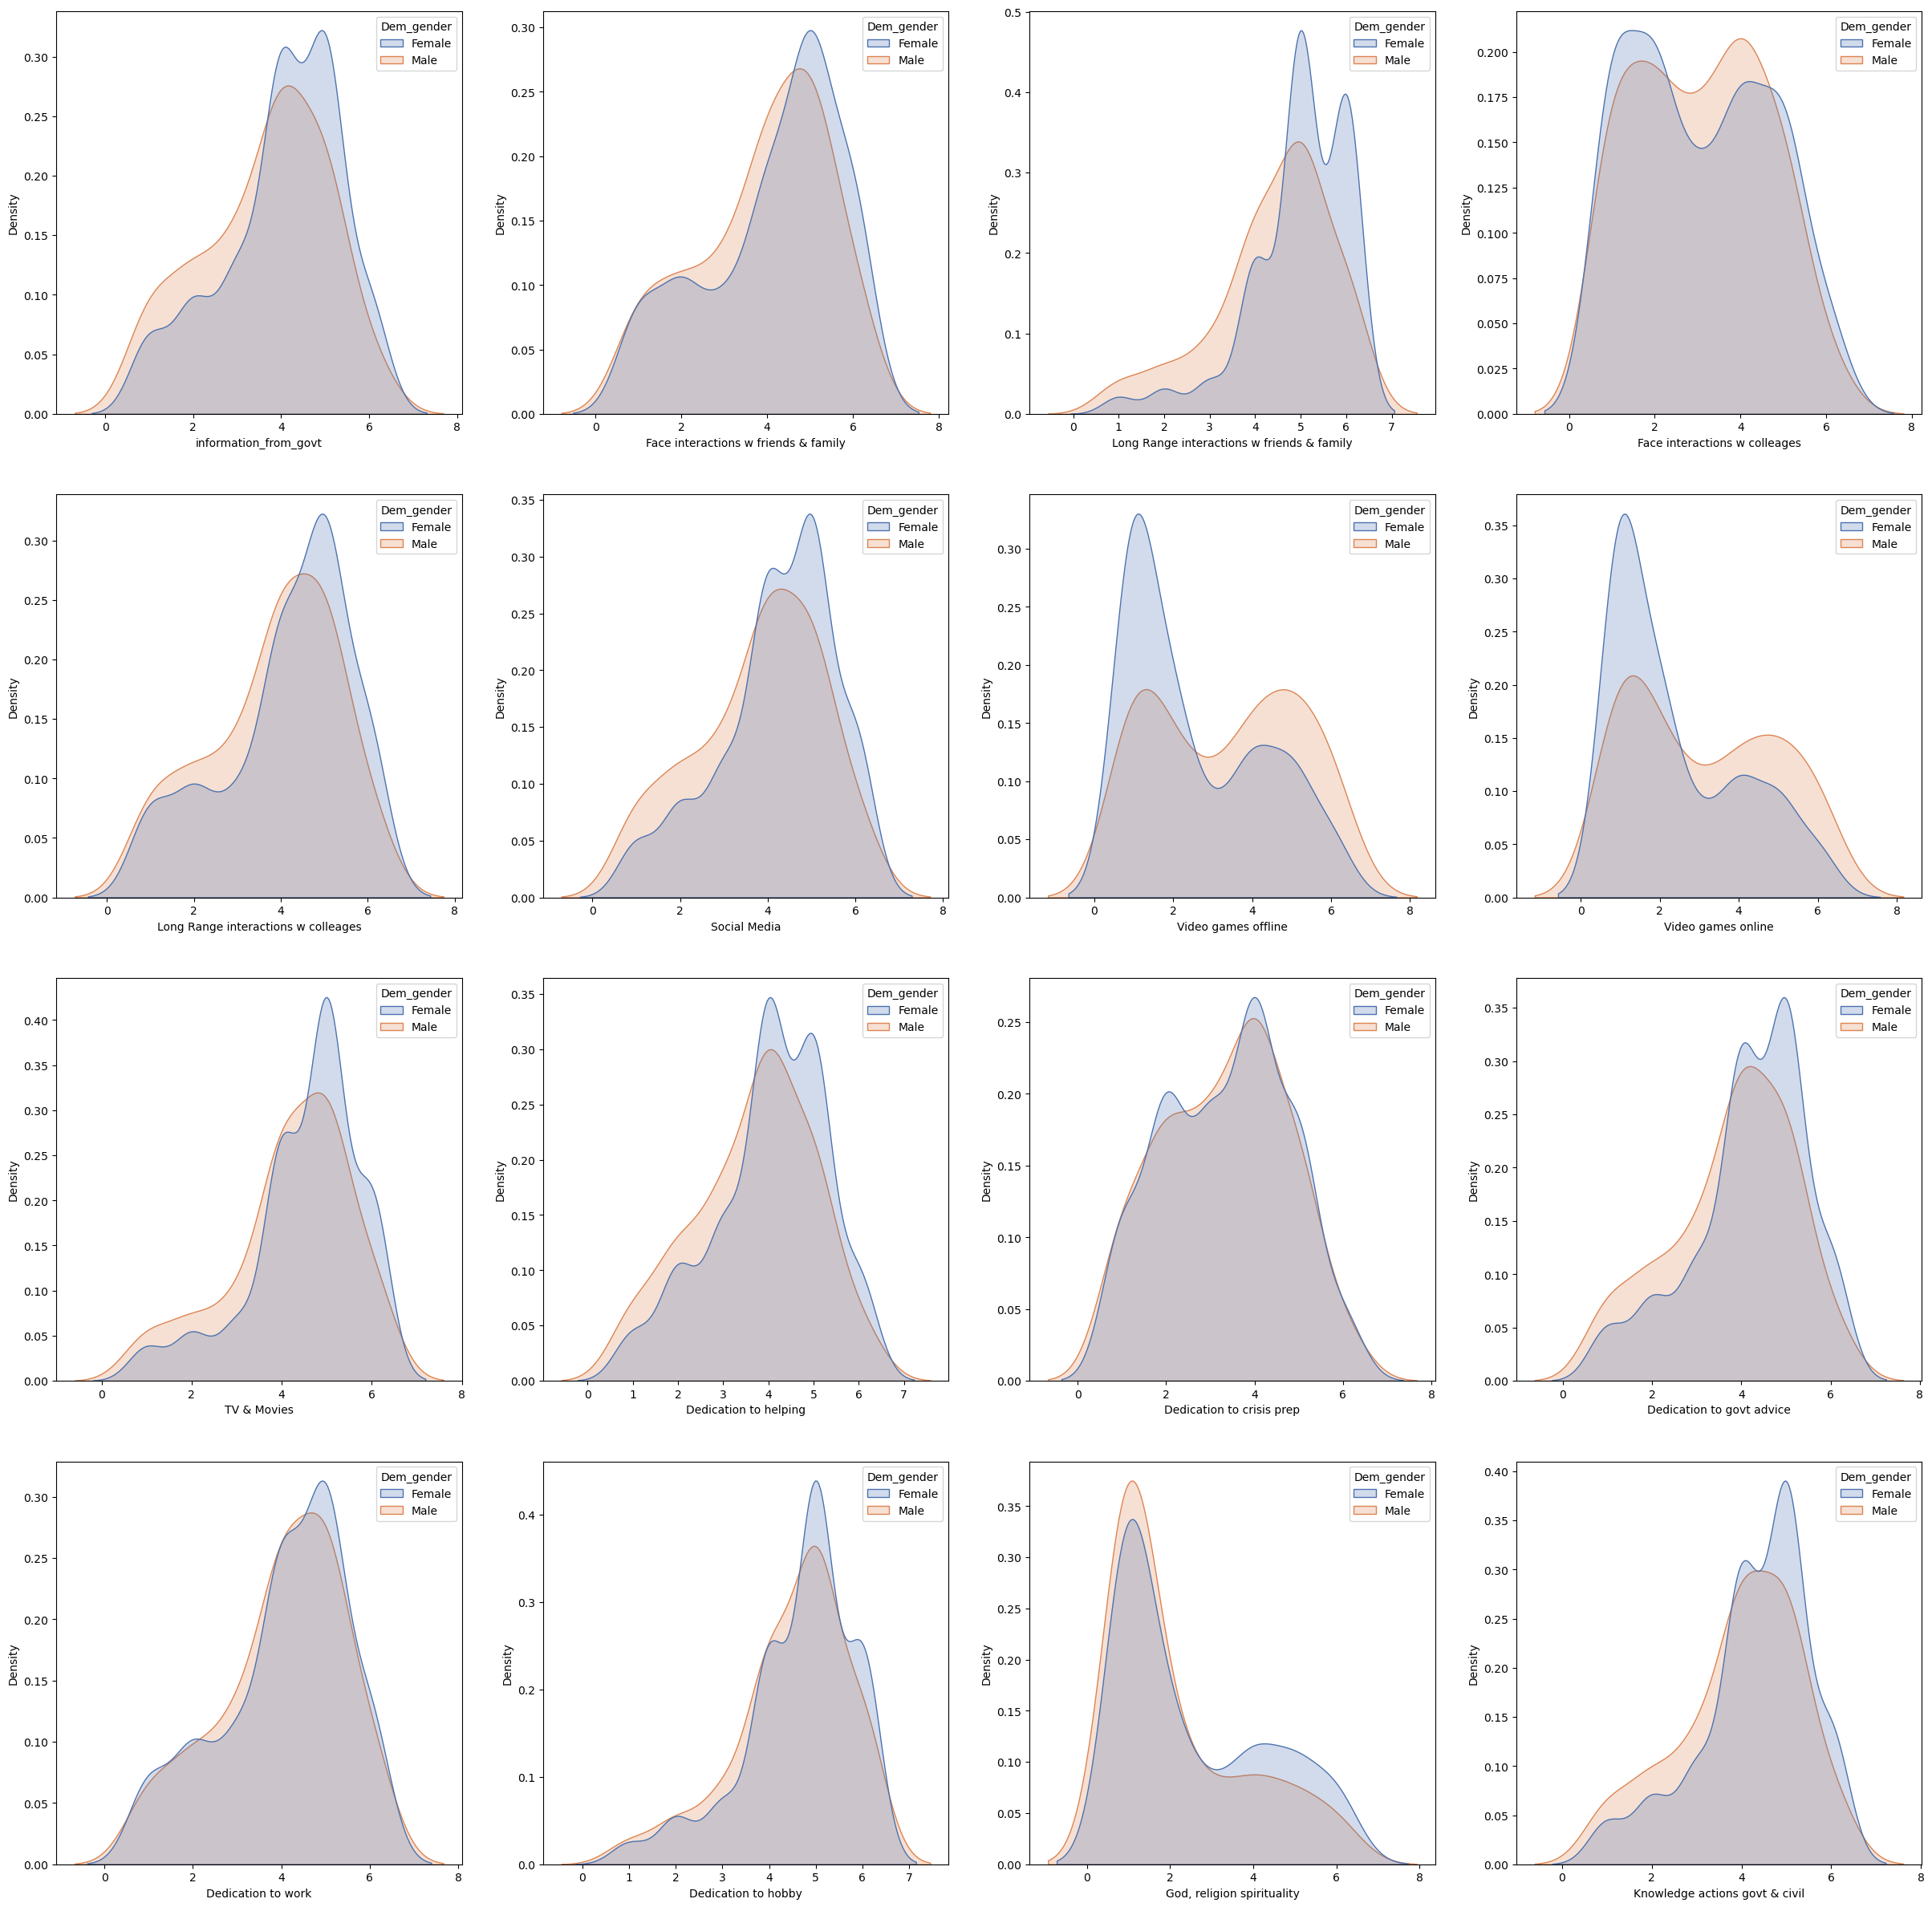

In [20]:
#----- looking at all the expl_Coping by gender -----
rename_d = {'Expl_Coping_1': 'information_from_govt', 'Expl_Coping_2': 'Face interactions w friends & family', 
        'Expl_Coping_3': 'Long Range interactions w friends & family','Expl_Coping_4': 'Face interactions w colleages', 'Expl_Coping_5':'Long Range interactions w colleages',
       'Expl_Coping_6':'Social Media', 'Expl_Coping_7':'Video games offline', 'Expl_Coping_8': 'Video games online', 
        'Expl_Coping_9':'TV & Movies', 'Expl_Coping_10':'Dedication to helping', 'Expl_Coping_11': 'Dedication to crisis prep',
        'Expl_Coping_12': 'Dedication to govt advice', 'Expl_Coping_13': 'Dedication to work',
      'Expl_Coping_14':'Dedication to hobby', 'Expl_Coping_15': 'God, religion spirituality', 
        'Expl_Coping_16':'Knowledge actions govt & civil'}


import math
df2 = df.loc[:,['Dem_gender','Expl_Coping_1',  'Expl_Coping_2','Expl_Coping_3', 'Expl_Coping_4','Expl_Coping_5',
        'Expl_Coping_6','Expl_Coping_7', 'Expl_Coping_8','Expl_Coping_9', 'Expl_Coping_10','Expl_Coping_11',
        'Expl_Coping_12','Expl_Coping_13','Expl_Coping_14', 'Expl_Coping_15', 'Expl_Coping_16']]

fig, axis = plt.subplots(4,4, figsize=(30,30))


for i in range(0,16):
    col = 'Expl_Coping_' + str(i+1)
    ax=[math.floor(i/4), i%4]
    k = sns.kdeplot(data=df2[(df2['Dem_gender'] == 'Female') | (df2['Dem_gender'] == 'Male')],
            hue='Dem_gender', x=col, fill=True, bw_adjust=3, palette =sns.color_palette("deep", 2), 
            common_norm=False, ax=axis[math.floor(i/4), i%4])
    axis[math.floor(i/4), i%4].set_xlabel(rename_d[col])
plt.show()


In [21]:
# run ttests

# **Data Analysis to answer our questions**
##  Q1: Did men and women have similar/different concerns during Covid? 

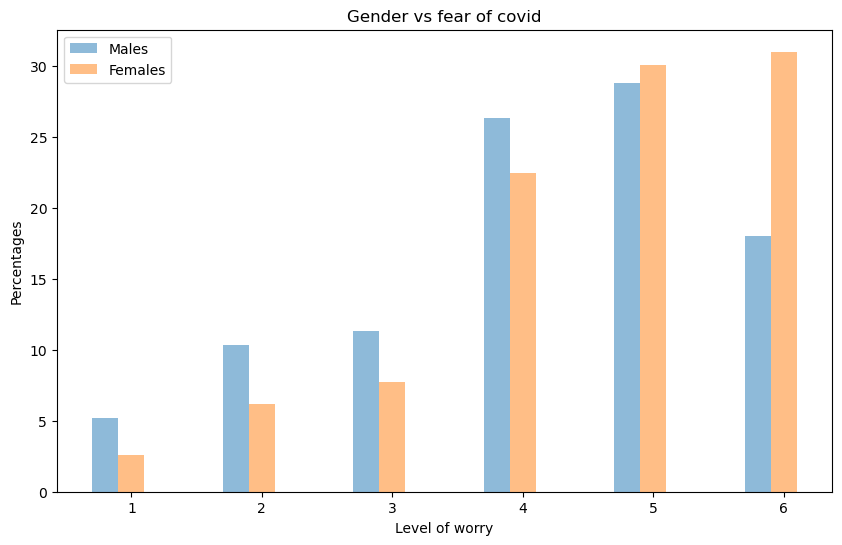

In [22]:
# ------------------- Plotting the distribution of income stress by gender -----------------------
x = np.arange(1,7)
width = 0.2
plt.figure(figsize=(10, 6))

df_male = df[df['Dem_gender'] == 'Male']
df_female = df[df['Dem_gender'] == 'Female']
tm = df_male['Expl_Distress_12'].value_counts().sum()
tf = df_female['Expl_Distress_12'].value_counts().sum()
vcom = df_male['Expl_Distress_12'].value_counts()
vcof = df_female['Expl_Distress_12'].value_counts()

# you can change the following two lines for counts instead of percentage
plt.bar(vcom.index-0.2, [el*100/tm for el in vcom.to_list()], width, alpha=0.5, label="Males")
plt.bar(vcof.index, [el*100/tf for el in vcof.to_list()], width, alpha=0.5, label="Females")

plt.xlabel("Level of worry")
plt.ylabel("Percentages")
plt.title("Gender vs fear of covid")
plt.legend()
plt.show()



In [23]:
# Q1: Did men and women have similar/different concerns during Covid? 
# Not much difference except women rated everthing higher than men

total_females = df[df['Dem_gender']=='Female'].shape[0]
total_males = df[df['Dem_gender']=='Male'].shape[0]
no_gen = df[df['Dem_gender']=='Other/would rather not say'].shape[0]

concerned_columns = ['Dem_gender','baseline', 'cc_yff', 'cc_countries','Expl_Distress_1', 'Expl_Distress_2', 
        'Expl_Distress_3', 'Expl_Distress_4', 'Expl_Distress_5', 'Expl_Distress_6',
       'Expl_Distress_7', 'Expl_Distress_8', 'Expl_Distress_9',
       'Expl_Distress_10', 'Expl_Distress_11', 'Expl_Distress_12',
       'Expl_Distress_13', 'Expl_Distress_14', 'Expl_Distress_15',
       'Expl_Distress_16', 'Expl_Distress_17', 'Expl_Distress_18',
       'Expl_Distress_19', 'Expl_Distress_20', 'Expl_Distress_21',
       'Expl_Distress_22', 'Expl_Distress_23', 'Expl_Distress_24',]
subset_df = df[concerned_columns]

females_concerns = subset_df[subset_df['Dem_gender']=='Female']
males_concerns = subset_df[subset_df['Dem_gender']=='Male']


#this tells you the average of all men and women rating. 
gb=subset_df.groupby('Dem_gender').mean()
gb.to_clipboard(index=False,header=False)
gb

baseline    cc_yff  cc_countries  Expl_Distress_1  \
Dem_gender                                                                      
Female                      3.724849  4.517430      4.901315         3.597949   
Male                        3.435813  4.229015      4.639076         3.334004   
Other/would rather not say  3.976601  4.337569      4.680191         3.679321   

                            Expl_Distress_2  Expl_Distress_3  Expl_Distress_4  \
Dem_gender                                                                      
Female                             3.700148         3.412775         3.899534   
Male                               3.428827         3.136033         3.635773   
Other/would rather not say         3.764454         3.020134         4.032321   

                            Expl_Distress_5  Expl_Distress_6  Expl_Distress_7  \
Dem_gender                                                                      
Female                             3.155196         3.696654         1.989698   
Male                               3.020669         3.489754         1.877222   
Other/would rather not say         3.188172         3.569620         1.771499   

                            Expl_Distress_8  Expl_Distress_9  \
Dem_gender                                                     
Female                             3.128310         3.107959   
Male                               2.925969         2.690853   
Other/would rather not say         3.338926         2.939954   

                            Expl_Distress_10  Expl_Distress_11  \
Dem_gender                                                       
Female                              4.925299          3.490329   
Male                                4.610977          3.346999   
Other/would rather not say          4.314260          3.558248   

                            Expl_Distress_12  Expl_Distress_13  \
Dem_gender                                                       
Female                              4.642380          4.635196   
Male                                4.173456          4.151865   
Other/would rather not say          4.412713          4.419297   

                            Expl_Distress_14  Expl_Distress_15  \
Dem_gender                                                       
Female                              4.520618          3.078008   
Male                                4.056510          2.714083   
Other/would rather not say          4.352995          3.038462   

                            Expl_Distress_16  Expl_Distress_17  \
Dem_gender                                                       
Female                              3.197653          2.551589   
Male                                2.812667          2.427194   
Other/would rather not say          3.000000          2.545712   

                            Expl_Distress_18  Expl_Distress_19  \
Dem_gender                                                       
Female                              3.271546          3.628119   
Male                                2.956911          3.332040   
Other/would rather not say          3.356301          3.462646   

                            Expl_Distress_20  Expl_Distress_21  \
Dem_gender                                                       
Female                              3.357845          3.571153   
Male                                3.109063          3.298427   
Other/would rather not say          3.319617          3.532550   

                            Expl_Distress_22  Expl_Distress_23  \
Dem_gender                                                       
Female                              2.486493          4.496354   
Male                                2.433377          4.053424   
Other/would rather not say          2.475023          4.269300   

                            Expl_Distress_24  
Dem_gender                                    
Female                              3.172352  
Male                           

<Figure size 3000x2000 with 0 Axes>

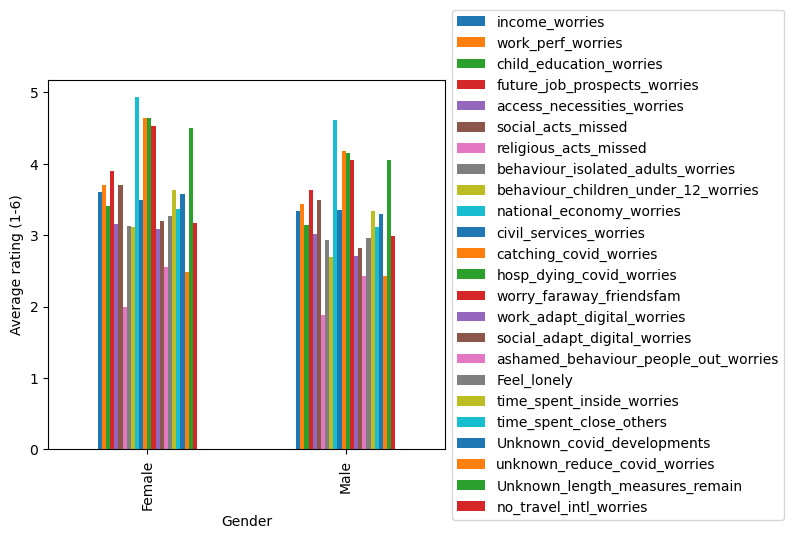

In [24]:
# plot the distress features 
total_females = df[df['Dem_gender']=='Female'].shape[0]
total_males = df[df['Dem_gender']=='Male'].shape[0]
no_gen = df[df['Dem_gender']=='Other/would rather not say'].shape[0]

#Renaming columns to understand better
concerned_columns = ['Dem_gender','Expl_Distress_1', 'Expl_Distress_2', 
        'Expl_Distress_3', 'Expl_Distress_4', 'Expl_Distress_5', 'Expl_Distress_6',
       'Expl_Distress_7', 'Expl_Distress_8', 'Expl_Distress_9',
       'Expl_Distress_10', 'Expl_Distress_11', 'Expl_Distress_12',
       'Expl_Distress_13', 'Expl_Distress_14', 'Expl_Distress_15',
       'Expl_Distress_16', 'Expl_Distress_17', 'Expl_Distress_18',
       'Expl_Distress_19', 'Expl_Distress_20', 'Expl_Distress_21',
       'Expl_Distress_22', 'Expl_Distress_23', 'Expl_Distress_24',]

rename_dict = {'Expl_Distress_1':'income_worries', 'Expl_Distress_2':'work_perf_worries',
        'Expl_Distress_3': 'child_education_worries', 'Expl_Distress_4': 'future_job_prospects_worries', 
        'Expl_Distress_5': 'access_necessities_worries', 'Expl_Distress_6': 'social_acts_missed',
        'Expl_Distress_7': 'religious_acts_missed', 'Expl_Distress_8': 'behaviour_isolated_adults_worries', 
        'Expl_Distress_9': 'behaviour_children_under_12_worries','Expl_Distress_10': 'national_economy_worries', 
        'Expl_Distress_11':'civil_services_worries', 'Expl_Distress_12':'catching_covid_worries',
        'Expl_Distress_13':'hosp_dying_covid_worries', 'Expl_Distress_14':'worry_faraway_friendsfam', 
        'Expl_Distress_15':'work_adapt_digital_worries','Expl_Distress_16': 'social_adapt_digital_worries', 
        'Expl_Distress_17': 'ashamed_behaviour_people_out_worries', 'Expl_Distress_18':'Feel_lonely',
        'Expl_Distress_19': 'time_spent_inside_worries', 'Expl_Distress_20':'time_spent_close_others', 
        'Expl_Distress_21': 'Unknown_covid_developments','Expl_Distress_22':'unknown_reduce_covid_worries',
        'Expl_Distress_23':'Unknown_length_measures_remain', 'Expl_Distress_24':'no_travel_intl_worries'}

subset_df_distress = df[concerned_columns].copy(deep=True)
subset_df_distress.rename(columns=rename_dict, inplace=True)


#this tells you the average of all men and women rating. Removing third gender
gb=subset_df_distress.groupby('Dem_gender').mean()
gb.drop( 'Other/would rather not say', inplace = True, axis=0)
gb = gb.loc[:, gb.columns != 'Other/would rather not say']

# ---------------------- Plotting ---------------------------
fig = plt.figure(figsize=(30,20))
ax=gb.plot.bar()

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_ylabel("Average rating (1-6)")
ax.set_xlabel('Gender')
plt.show()



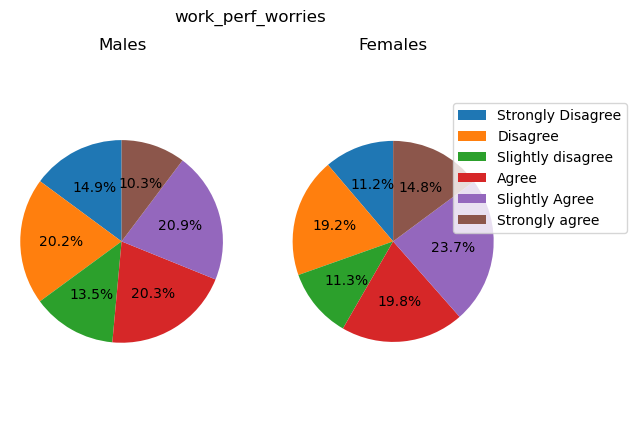

In [25]:
# This tells you distribution of ratings by gender


def pie_chart (column_name, dframe, ifonlyagree=True, extreme=False):
    dict_num_labels = {1.0: 'Strongly Disagree', 2:'Disagree', 3:'Slightly disagree', 4:'Agree', 5:'Slightly Agree',
                      6:'Strongly agree'}
    
    if ifonlyagree == True:
        dframe = dframe.loc[(dframe[column_name] > 5)] 
   
        females_concerns = dframe[dframe['Dem_gender']=='Female']
        males_concerns = dframe[dframe['Dem_gender']=='Male']

        tf, tm, tot = females_concerns.shape[0], males_concerns.shape[0], dframe.shape[0]
        print(tf, tm, tot)
        fig, ax = plt.subplots(1,1)
        ax.pie([tf, tm], labels=["Females", "Males"], autopct='%1.1f%%',
                    startangle=90)
        ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
        ax.set_title(column_name)
        plt.show()

    
    else:
        females_concerns = dframe[dframe['Dem_gender']=='Female']
        males_concerns = dframe[dframe['Dem_gender']=='Male']
        total_who_filled = females_concerns[column_name].value_counts().sum()
        dictf = females_concerns[column_name].value_counts()/total_who_filled
        dict_f = dict(sorted(dictf.items()))


        men_who_filled = males_concerns[column_name].value_counts().sum()
        dictm = males_concerns[column_name].value_counts()/men_who_filled
        dict_m = dict(sorted(dictm.items()))

        
        fig1, [ax1, ax2] = plt.subplots(1,2 )
        pie = ax1.pie(dict_m.values(), radius=2,autopct='%1.1f%%', startangle=90, )
        ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
        ax1.set_title("Males")

        
        pie2 = ax2.pie(dict_f.values(), radius=2, autopct='%1.1f%%', startangle=90,)
        ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
        ax2.set_title("Females")
  
        
        
        labels=[dict_num_labels[i] for i in dict_f.keys()]
        plt.legend(pie[0],labels, bbox_to_anchor=(1.1,0.5), loc="lower right", 
                          bbox_transform=plt.gcf().transFigure)
        fig1.suptitle(column_name)
        plt.show()

# pie_chart('Expl_Distress_5', df, False, False)
pie_chart ('work_perf_worries', subset_df_distress, False, False)

In [26]:
#----- I am making groups here and joining baseline 
gb_mf = gb.iloc[0:2]

col1 = ['Expl_Distress_1']
col2 = ['Expl_Distress_3', 'Expl_Distress_9']
col3 = ['Expl_Distress_12', 'Expl_Distress_13', 'Expl_Distress_14']

my_groups_df = pd.DataFrame()
my_groups_df['Dem_gender'] = subset_df['Dem_gender']
my_groups_df['baseline'] = subset_df['baseline']
my_groups_df['work/finances'] = subset_df[col1].mean(axis=1)
my_groups_df['Children\'s Responsibility'] = subset_df[col2].mean(axis=1)  
my_groups_df['Friends/Family/myself covid and other worries'] = subset_df[col3].mean(axis=1) 
# my_groups_df.drop(df['Dem_gender'] == 'Other/would rather not say', inplace = True)
my_groups_df = my_groups_df[my_groups_df['Dem_gender'] != 'Other/would rather not say']

gbm = my_groups_df.groupby('Dem_gender').mean()

bl_f_m = gbm.loc['Female', 'baseline'] - gbm.loc['Male', 'baseline']
gbm.loc[['Male'], :] = gbm.loc[['Male'], :] + bl_f_m
gbm

baseline  work/finances  Children's Responsibility  \
Dem_gender                                                       
Female      3.724849       3.597949                   3.307732   
Male        3.724849       3.623040                   3.247342   

            Friends/Family/myself covid and other worries  
Dem_gender                                                 
Female                                           4.601210  
Male                                             4.420655

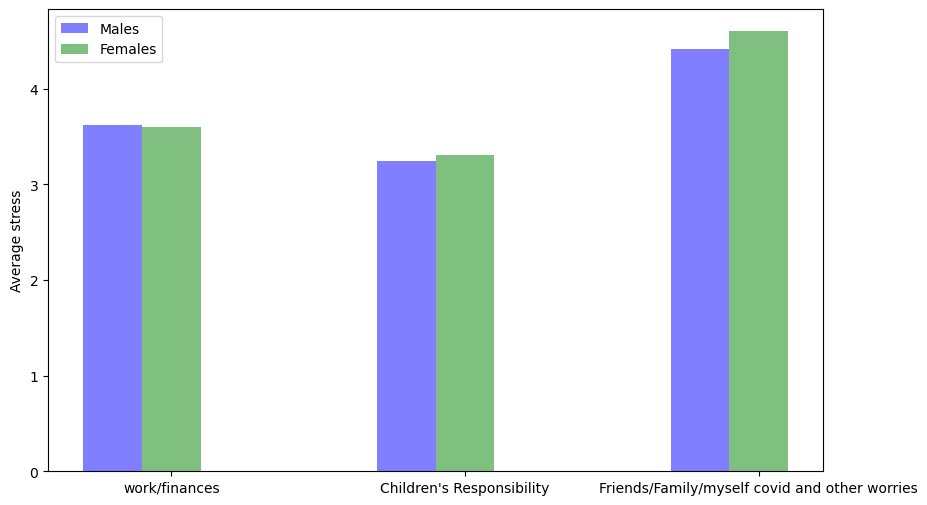

In [27]:
# ------------------- Plotting the distribution of income stress by gender -----------------------
x = np.arange(0,3)
width = 0.2
plt.figure(figsize=(10, 6))
interested_cols = ['work/finances', "Children's Responsibility", 'Friends/Family/myself covid and other worries']
df_female = gbm[gbm.index == 'Female'][interested_cols].values.ravel()
df_male = gbm[gbm.index == 'Male'][interested_cols].values.ravel()

# # you can change the following two lines for counts instead of percentage
plt.bar(x-0.2, df_male, width, alpha=0.5, label="Males", color = "blue")
plt.bar(x, df_female, width, alpha=0.5, label="Females", color="green")


plt.xticks(x, interested_cols)
plt.ylabel("Average stress")
# plt.title("Gender vs day-income worries")
plt.legend()
plt.show()



In [28]:
import scipy
from scipy import stats

c = 'work/finances'
a = my_groups_df[my_groups_df['Dem_gender']=='Female'][c]
b = my_groups_df[my_groups_df['Dem_gender']=='Male'][c] + bl_f_m
# print(a)
_, p = scipy.stats.ttest_ind(a,b, nan_policy = 'omit')
p


0.05385165990929386

In [30]:

#---------- for the stress level, married/cohabiting were the ones with most support system rating 
#  for both females and males------
distresscolumns =['Gender', 'Country', 'Long Range interactions w friends & family', \
                            'Dedication to hobby', 'TV & Movies', 'Social Media', 'Knowledge actions govt & civil',
                           'Dedication to work', 'Face interactions w friends & family']
if 'Dem_maritalstatus' not in my_groups_df:
    my_groups_df = pd.concat([my_groups_df, df['Dem_maritalstatus']], axis=1)
cols = ['Dem_maritalstatus']+distresscolumns
# print(cols)
ss_df = my_groups_df.loc[:,]
ss_df = ss_df[ss_df['Dem_gender'] != 'Other/would rather not say']
ss_df = ss_df[(ss_df['Dem_maritalstatus'] != 'Other or would rather not say') & (ss_df['Dem_maritalstatus'] != 'Uninformative response')]
gb = ss_df.groupby(['Dem_gender', 'Dem_maritalstatus']).mean()
gb

baseline  work/finances  \
Dem_gender Dem_maritalstatus                             
Female     Divorced/widowed    3.317885       3.539261   
           Married/cohabiting  3.630679       3.480358   
           Single              3.989396       3.806741   
Male       Divorced/widowed    3.184672       3.405518   
           Married/cohabiting  3.288953       3.270755   
           Single              3.640192       3.393016   

                               Children's Responsibility  \
Dem_gender Dem_maritalstatus                               
Female     Divorced/widowed                     3.389236   
           Married/cohabiting                   3.420671   
           Single                               2.969266   
Male       Divorced/widowed                     3.141692   
           Married/cohabiting                   3.147709   
           Single                               2.569045   

                               Friends/Family/myself covid and other worries  
Dem_gender Dem_maritalstatus                                                  
Female     Divorced/widowed                                         4.494693  
           Married/cohabiting                                       4.597161  
           Single                                                   4.635265  
Male       Divorced/widowed                                         4.081574  
           Married/cohabiting                                       4.113997  
           Single                                                   4.163141

In [33]:
#----- extract only the 5-6s in the data and see what percentage men and women voted

count_percent = False
by_mean = False
if 'Country' not in my_groups_df:
    my_groups_df = pd.concat([my_groups_df, df['Country']], axis=1)

# for col in distresscolumns:
#     sdf = subset_df.loc[subset_df[col] > 5] 

expl_dis_maps ={}
for col in my_groups_df.columns[2:]:
    if col != 'Country' and col != 'Dem_maritalstatus':
        sdf = my_groups_df.loc[(my_groups_df[col] > 4)] 
#         sdf[col] = sdf[col] - sdf['baseline']
        sdf = sdf.loc[:, ['Dem_gender', col, 'Country']]
        print(col)
        if count_percent:
            tmp = sdf.groupby(['Dem_gender', 'Country']).count()
            tmp.loc['Female'] = tmp.loc['Female']*100/total_females
            tmp.loc['Male'] = tmp.loc['Male']*100/total_males
            tmp.drop(['Other/would rather not say'], inplace=True)
            print("Total % males who rated 5-6 = ", tmp.loc['Male', col])
            print("Total % Females who rated 5-6 = ", tmp.loc['Female',col])
        elif by_mean: 
            tmp = sdf.groupby(['Dem_gender']).mean()
            tmp.drop(['Other/would rather not say'], inplace=True)
            print("Mean for males = ", tmp.loc['Male', col])
            print("Mean for females = ", tmp.loc['Female',col])

        else:
            tmp = sdf.groupby(['Country', 'Dem_gender']).mean()
            d = {}
            countries = (tmp.index.get_level_values('Country'))
            for c in countries:
                v = tmp.loc[c]
                if v.shape[0] > 1:
                    if (v.loc['Female', col] - v.loc['Male', col]) >= 0:
                        d[c] = "Females > Males"
                    else:
                        d[c] = "Males > Females"

            map_d = pd.DataFrame(list(d.items())).rename(columns = {0:'name', 1: 'value'}).set_index('name')
            expl_dis_maps[col] = map_d

len(expl_dis_maps)

work/finances
Children's Responsibility
Friends/Family/myself covid and other worries


3

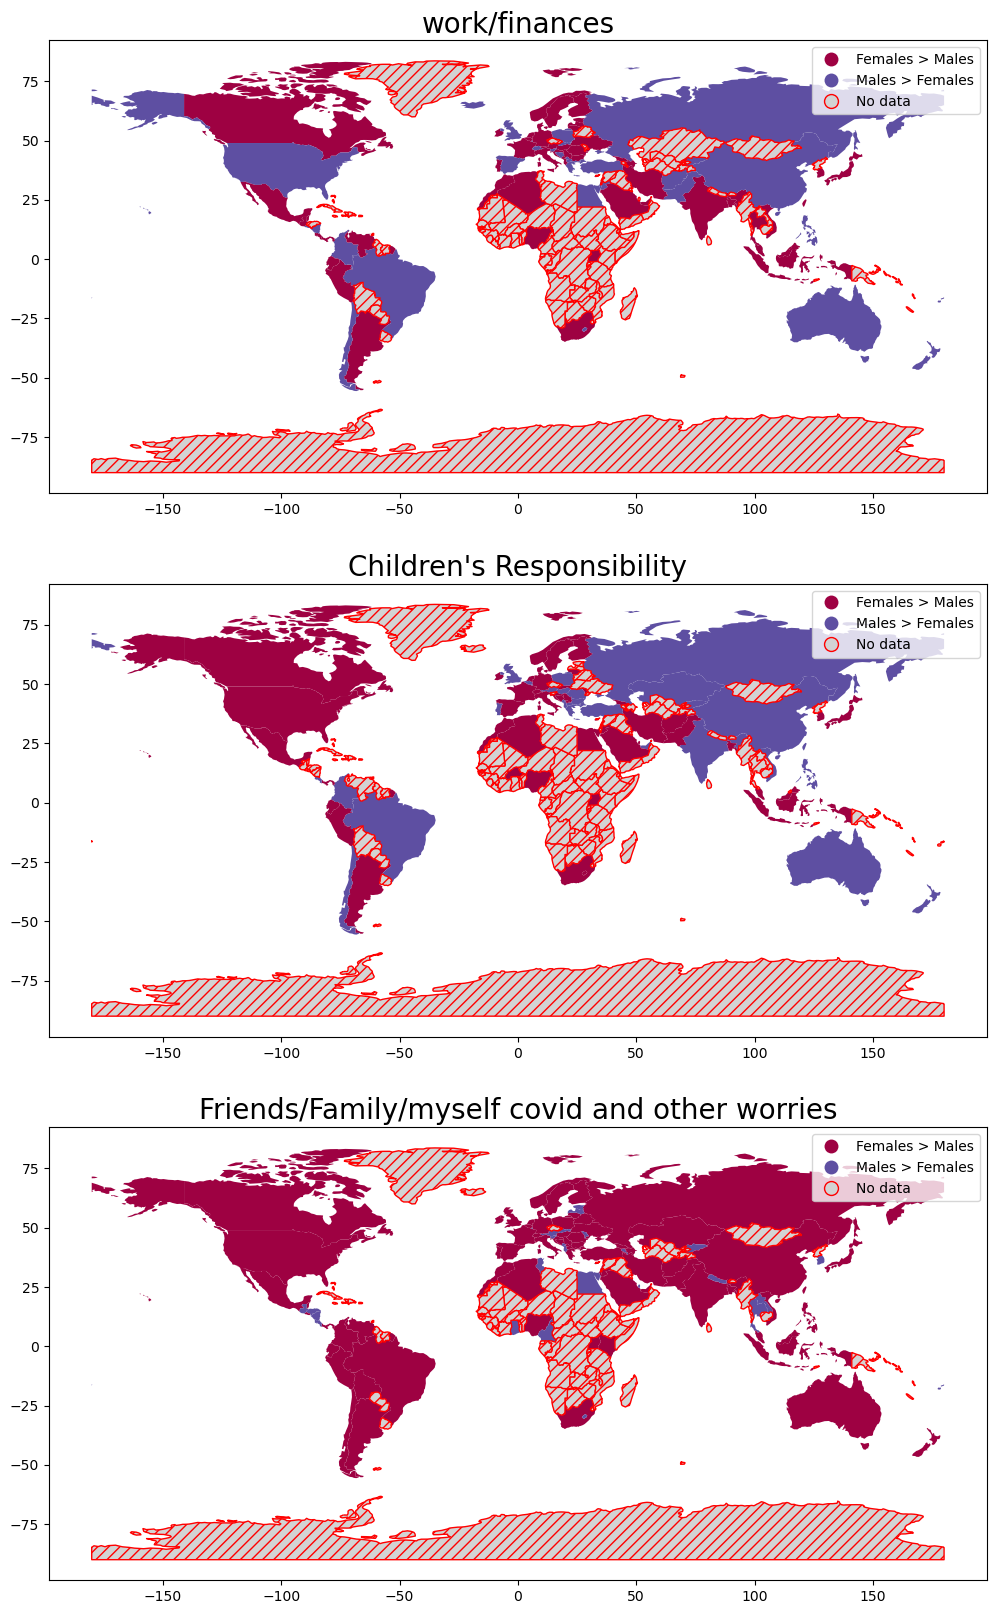

In [34]:
# ------------------------ Draw Geographic maps to show country distributions ------------------------
fig, axis = plt.subplots(3,1, figsize=(20,20))

i=0
for dv, map_d in expl_dis_maps.items(): 
    world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
    world.columns=['pop_est', 'continent', 'name', 'CODE', 'gdp_md_est', 'geometry']

    merge=pd.merge(world, map_d, on='name', how='left')

    location=pd.read_csv('https://raw.githubusercontent.com/melanieshi0120/COVID-19_global_time_series_panel_data/master/data/countries_latitude_longitude.csv')
    # merge=merge.merge(location,on='name').sort_values(by='count',ascending=False).reset_index()
    merge.plot(column='value', 
               ax=axis[i],
    #            scheme="quantiles",
               cmap='Spectral',
               figsize=(25, 20),
               legend=True,
               categorical= True,
                    missing_kwds={
            "color": "lightgrey",
            "edgecolor": "red",
            "hatch": "///",
            "label": "No data",
        })
    axis[i].set_title(dv, fontsize=20)
    i+=1
plt.show()

12645 3481 16153


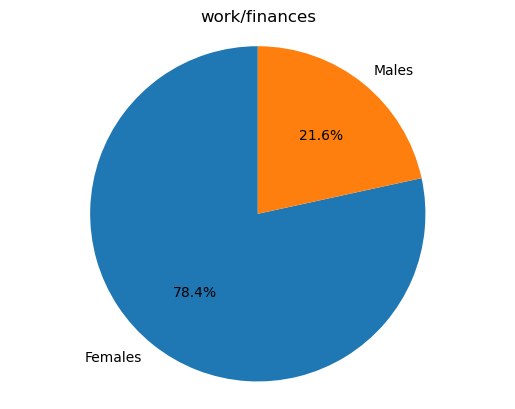

In [35]:

# Friends/Family/myself covid and other worries
# pie_chart('Friends/Family/myself covid and other worries', my_groups_df, ifonlyagree=True, extreme=False)
pie_chart('work/finances', my_groups_df, ifonlyagree=True, extreme=False)

##  Q2: Were Coping mechanisms different between females and males during Covid?

In [36]:
#In case we want to see correlations between different values
ec =['Expl_Coping_1',  'Expl_Coping_2','Expl_Coping_3', 'Expl_Coping_4','Expl_Coping_5',
              'Expl_Coping_6','Expl_Coping_7', 'Expl_Coping_8','Expl_Coping_9', 'Expl_Coping_10','Expl_Coping_11',
              'Expl_Coping_12','Expl_Coping_13','Expl_Coping_14', 'Expl_Coping_15', 'Expl_Coping_16']

visualize = False
if visualize == True:
    plt.figure(figsize=(30, 30))
    sns.heatmap(df[ec].corr(), cbar=True,annot=True, cmap='Blues')
    plt.show()

In [37]:
#For coping, women, on average rated everything higher than males except video games --------

total_females = df[df['Dem_gender']=='Female'].shape[0]
total_males = df[df['Dem_gender']=='Male'].shape[0]
no_gen = df[df['Dem_gender']=='Other/would rather not say'].shape[0]

concerned_columns = ['Dem_gender'] + ec
subset_df = df[concerned_columns]

females_concerns = subset_df[subset_df['Dem_gender']=='Female']
males_concerns = subset_df[subset_df['Dem_gender']=='Male']


#this tells you the average of all men and women rating. 
gb=subset_df.groupby('Dem_gender').mean()

gb

Expl_Coping_1  Expl_Coping_2  Expl_Coping_3  \
Dem_gender                                                                
Female                           4.007090       4.125860       4.955625   
Male                             3.625630       3.898419       4.394135   
Other/would rather not say       3.631232       3.802632       4.551402   

                            Expl_Coping_4  Expl_Coping_5  Expl_Coping_6  \
Dem_gender                                                                
Female                           3.088658       4.127709       4.206879   
Male                             3.074497       3.821971       3.789476   
Other/would rather not say       2.680462       3.476600       3.935694   

                            Expl_Coping_7  Expl_Coping_8  Expl_Coping_9  \
Dem_gender                                                                
Female                           2.570654       2.409446       4.530349   
Male                             3.364987       3.119116       4.189388   
Other/would rather not say       3.515123       3.116038       4.418539   

                            Expl_Coping_10  Expl_Coping_11  Expl_Coping_12  \
Dem_gender                                                                   
Female                            4.024469        3.346320        4.178517   
Male                              3.680947        3.311210        3.788300   
Other/would rather not say        3.721698        3.139383        3.798131   

                            Expl_Coping_13  Expl_Coping_14  Expl_Coping_15  \
Dem_gender                                                                   
Female                            4.056814        4.631407        2.570566   
Male                              3.999794        4.482471        2.170509   
Other/would rather not say        3.628083        4.591799        2.147556   

                            Expl_Coping_16  
Dem_gender                                  
Female                            4.285394  
Male                              3.934043  
Other/would rather not say        3.950375

<Figure size 640x480 with 0 Axes>

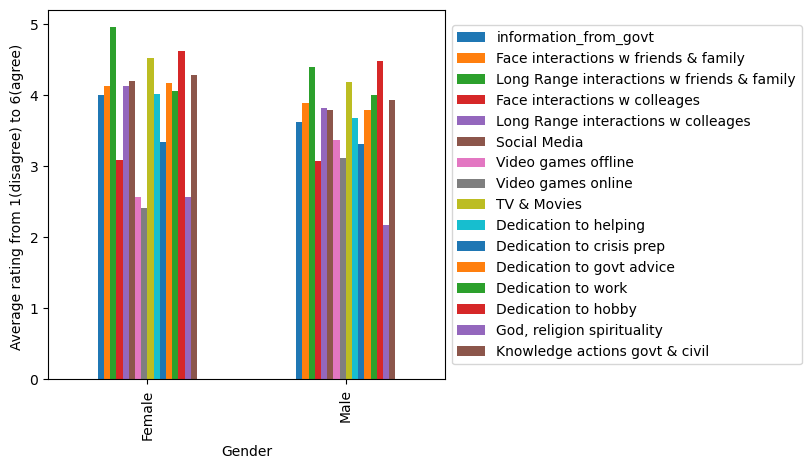

Top 5 coping mechanisms for men are 
----------------------------
Dedication to hobby                           4.482471
Long Range interactions w friends & family    4.394135
TV & Movies                                   4.189388
Dedication to work                            3.999794
Knowledge actions govt & civil                3.934043
Name: Male, dtype: float64
----------------------------
Top 5 coping mechanisms for females are 
----------------------------
Long Range interactions w friends & family    4.955625
Dedication to hobby                           4.631407
TV & Movies                                   4.530349
Knowledge actions govt & civil                4.285394
Social Media                                  4.206879
Name: Female, dtype: float64
----------------------------
The only options in which men rated higher than women were 
----------------------------
Video games offline
Video games online


In [38]:
# How different were the techniques women and men during covid found helpful? 
#In all fields, women were higher in their rating than in video games in which average agreement was more for men

total_females = df[df['Dem_gender']=='Female'].shape[0]
total_males = df[df['Dem_gender']=='Male'].shape[0]
no_gen = df[df['Dem_gender']=='Other/would rather not say'].shape[0]

#Renaming columns to understand better
concerned_columns = ['Dem_gender', 'Country', 'Expl_Coping_1',
       'Expl_Coping_2', 'Expl_Coping_3', 'Expl_Coping_4', 'Expl_Coping_5',
       'Expl_Coping_6', 'Expl_Coping_7', 'Expl_Coping_8', 'Expl_Coping_9',
       'Expl_Coping_10', 'Expl_Coping_11', 'Expl_Coping_12', 'Expl_Coping_13',
       'Expl_Coping_14', 'Expl_Coping_15', 'Expl_Coping_16']
subset_df = df[concerned_columns].copy(deep=True)
subset_df.rename(columns={'Dem_gender':'Gender', 'Expl_Coping_1': 'information_from_govt',
       'Expl_Coping_2': 'Face interactions w friends & family', 'Expl_Coping_3': 'Long Range interactions w friends & family',
        'Expl_Coping_4': 'Face interactions w colleages', 'Expl_Coping_5':'Long Range interactions w colleages',
       'Expl_Coping_6':'Social Media', 'Expl_Coping_7':'Video games offline', 'Expl_Coping_8': 'Video games online', 
        'Expl_Coping_9':'TV & Movies', 'Expl_Coping_10':'Dedication to helping', 'Expl_Coping_11': 'Dedication to crisis prep',
        'Expl_Coping_12': 'Dedication to govt advice', 'Expl_Coping_13': 'Dedication to work',
      'Expl_Coping_14':'Dedication to hobby', 'Expl_Coping_15': 'God, religion spirituality', 
        'Expl_Coping_16':'Knowledge actions govt & civil'}, inplace=True)


#this tells you the average of all men and women rating. Removing third gender
gb=subset_df.groupby('Gender').mean()
gb.drop( 'Other/would rather not say', inplace = True, axis=0)
gb = gb.loc[:, gb.columns != 'Other/would rather not say']

# ---------------------- Plotting ---------------------------
fig = plt.figure()
ax=gb.plot.bar()

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_ylabel("Average rating from 1(disagree) to 6(agree) ")
plt.show()

#------- Finding top 5 coping options for men and women -----------
gbt = gb.T
male_top_interests = gbt.nlargest(5, columns='Male')['Male']
female_top_interests = gbt.nlargest(5, columns='Female')['Female']


print ("Top 5 coping mechanisms for men are ")
print("----------------------------")
print(male_top_interests)
print("----------------------------")
print("Top 5 coping mechanisms for females are ")
print("----------------------------")
print(female_top_interests)


print("----------------------------")
print ("The only options in which men rated higher than women were ")
print("----------------------------")
answer = gbt[gbt['Male'] > gbt['Female']]
for i in answer.index:
    print(i)


In [39]:
#Which difference is significant enough? Using ttests
nul = "The female and male col values are same"

for col in ['Expl_Coping_9']:
    print(col)
    v1 = df[df['Dem_gender'] == 'Male'][col].dropna()
    v2 = df[df['Dem_gender'] == 'Female'][col].dropna()

    print(v1.mean())
    print(v2.mean())
    stats_utils.two_sample_ttest(v1, v2)

#answer: low p value means that they are NOT same. Diffrent

Expl_Coping_9
4.189388356669123
4.530348522312493
T-statistics:  -36.37991371994822
p-value:  9.758466975058492e-288
p-value < 0.05 True


In [40]:
#----- extract only the 5-6s in the data and see what percentage men and women voted

distresscolumns =['Gender', 'Country', 'Long Range interactions w friends & family', \
                            'Dedication to hobby', 'TV & Movies', 'Social Media', 'Knowledge actions govt & civil',
                           'Dedication to work', 'Face interactions w friends & family']
my_groups_df = subset_df.loc[:,distresscolumns]
my_groups_df = my_groups_df[my_groups_df['Gender']!= 'Other/would rather not say']

by_mean = False
if 'Country' not in my_groups_df:
    my_groups_df = pd.concat([my_groups_df, df['Country']], axis=1)

# for col in distresscolumns:
#     sdf = subset_df.loc[subset_df[col] > 5] 

expl_dis_maps ={}
for col in my_groups_df.columns[2:]:
    if col != 'Country':
        sdf = my_groups_df.loc[my_groups_df[col] > 4] 
    #     sdf[col] = sdf[col] - sdf['baseline']
        sdf = sdf.loc[:, ['Gender', col, 'Country']]
        print(col)
        if count_percent:
            tmp = sdf.groupby(['Gender', 'Country']).count()
            tmp.loc['Female'] = tmp.loc['Female']*100/total_females
            tmp.loc['Male'] = tmp.loc['Male']*100/total_males

            print("Total % males who rated 5-6 = ", tmp.loc['Male', col])
            print("Total % Females who rated 5-6 = ", tmp.loc['Female',col])
        elif by_mean: 
            tmp = sdf.groupby(['Gender']).mean()
            tmp.drop(['Other/would rather not say'], inplace=True)
            print("Mean for males = ", tmp.loc['Male', col])
            print("Mean for females = ", tmp.loc['Female',col])

        else:
            tmp = sdf.groupby(['Country', 'Gender']).mean()
            d = {}
            countries = (tmp.index.get_level_values('Country'))
            for c in countries:
                v = tmp.loc[c]
                if v.shape[0] > 1:
                    if (v.loc['Female', col] - v.loc['Male', col]) > 0:
                        d[c] = "Females > Males"
                    else:
                        d[c] = "Males > Females"

            map_d = pd.DataFrame(list(d.items())).rename(columns = {0:'name', 1: 'value'}).set_index('name')
            expl_dis_maps[col] = map_d

len(expl_dis_maps)

Long Range interactions w friends & family
Dedication to hobby
TV & Movies
Social Media
Knowledge actions govt & civil
Dedication to work
Face interactions w friends & family


7

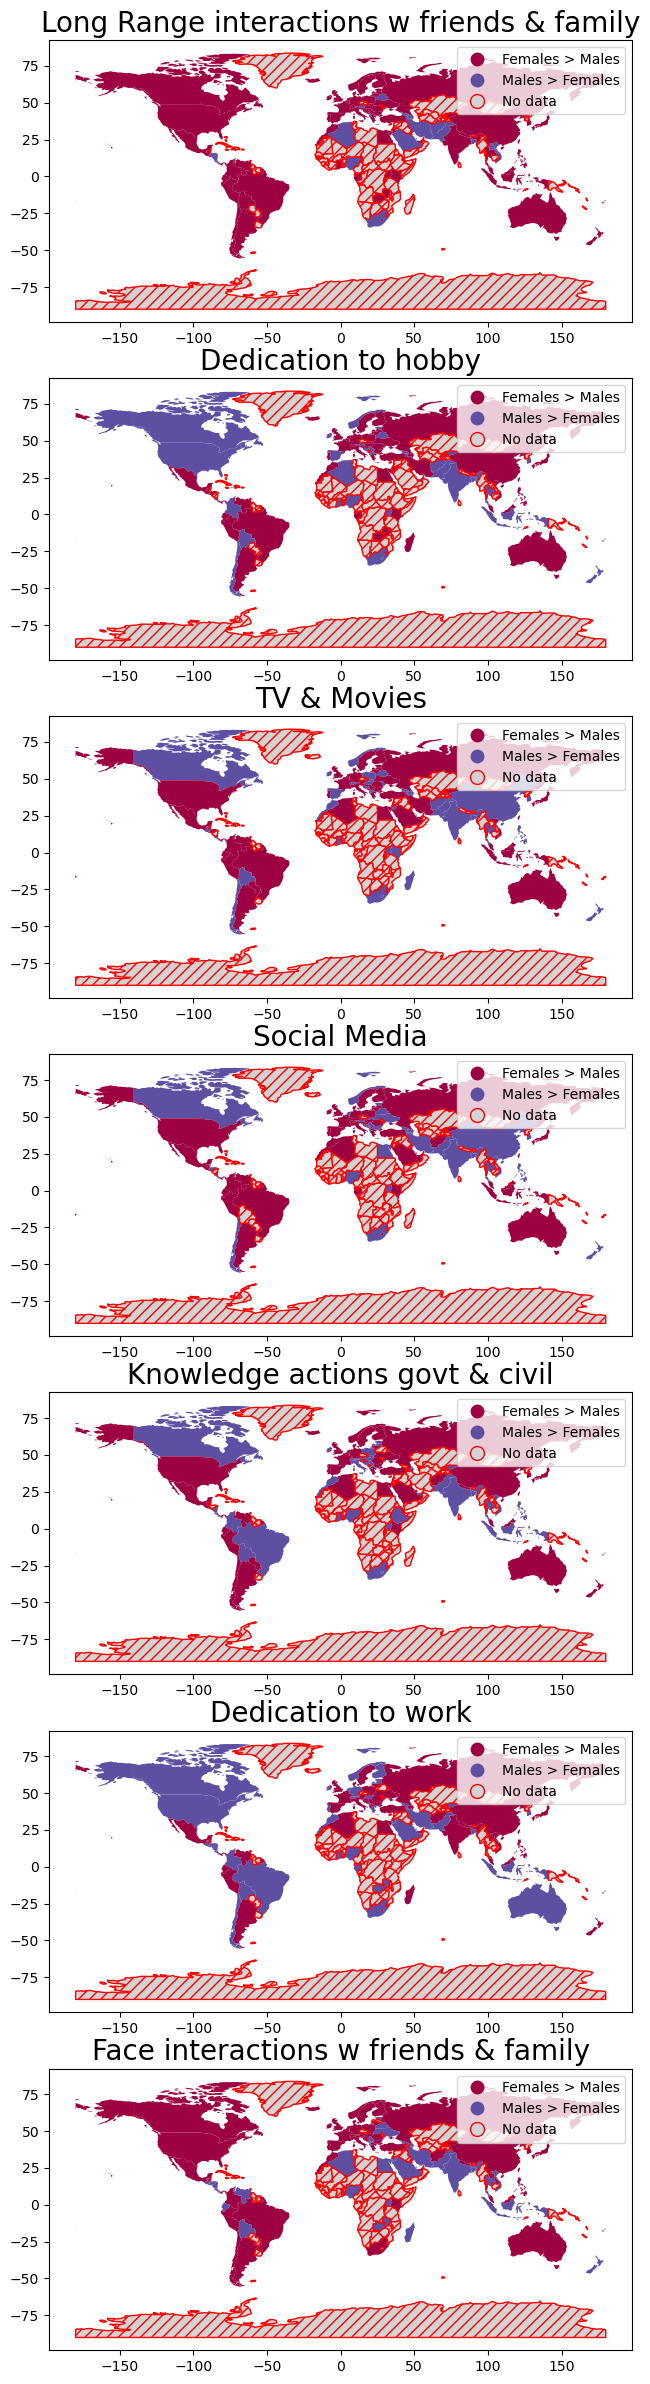

In [41]:
# ------------------------ Draw Geographic maps to show country distributions ------------------------
fig, axis = plt.subplots(7,1, figsize=(30,30))

i=0
for dv, map_d in expl_dis_maps.items(): 
    world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
    world.columns=['pop_est', 'continent', 'name', 'CODE', 'gdp_md_est', 'geometry']

    merge=pd.merge(world, map_d, on='name', how='left')

    location=pd.read_csv('https://raw.githubusercontent.com/melanieshi0120/COVID-19_global_time_series_panel_data/master/data/countries_latitude_longitude.csv')
    # merge=merge.merge(location,on='name').sort_values(by='count',ascending=False).reset_index()
    merge.plot(column='value', 
               ax=axis[i],
    #            scheme="quantiles",
               cmap='Spectral',
               figsize=(25, 20),
               legend=True,
               categorical= True,
                    missing_kwds={
            "color": "lightgrey",
            "edgecolor": "red",
            "hatch": "///",
            "label": "No data",
        })
    axis[i].set_title(dv, fontsize=20)
    i+=1
plt.show()

In [42]:

#---------- for the support system, married/cohabiting were the ones with most support system rating 
#  for both females and males------
if 'Dem_maritalstatus' not in my_groups_df:
    my_groups_df = pd.concat([my_groups_df, df['Dem_maritalstatus']], axis=1)
cols = ['Dem_maritalstatus']+distresscolumns
# print(cols)
ss_df = my_groups_df.loc[:,]
ss_df = ss_df[ss_df['Gender'] != 'Other/would rather not say']
ss_df = ss_df[(ss_df['Dem_maritalstatus'] != 'Other or would rather not say') & (ss_df['Dem_maritalstatus'] != 'Uninformative response')]
gb = ss_df.groupby(['Gender', 'Dem_maritalstatus']).mean()
gb

Long Range interactions w friends & family  \
Gender Dem_maritalstatus                                                
Female Divorced/widowed                                      5.016264   
       Married/cohabiting                                    4.972129   
       Single                                                4.909010   
Male   Divorced/widowed                                      4.460016   
       Married/cohabiting                                    4.390453   
       Single                                                4.388843   

                           Dedication to hobby  TV & Movies  Social Media  \
Gender Dem_maritalstatus                                                    
Female Divorced/widowed               4.548424     4.449828      4.334490   
       Married/cohabiting             4.579047     4.484844      4.157996   
       Single                         4.744349     4.635244      4.261385   
Male   Divorced/widowed               4.354839     4.046243      3.865560   
       Married/cohabiting             4.408822     4.143657      3.723089   
       Single                         4.588772     4.263476      3.858795   

                           Knowledge actions govt & civil  Dedication to work  \
Gender Dem_maritalstatus                                                        
Female Divorced/widowed                          4.325922            4.055251   
       Married/cohabiting                        4.317176            4.037355   
       Single                                    4.230522            4.097656   
Male   Divorced/widowed                          3.889165            3.941968   
       Married/cohabiting                        3.999041            4.069865   
       Single                                    3.868046            3.921734   

                           Face interactions w friends & family  
Gender Dem_maritalstatus                                         
Female Divorced/widowed                                3.963857  
       Married/cohabiting                              4.182392  
       Single                                          4.059080  
Male   Divorced/widowed                                3.774730  
       Married/cohabiting                              4.011375  
       Single                                          3.760320

## *Q3 What is your support system?*

In [43]:
#In case we want to see correlations between different values
sps = ['SPS_1', 'SPS_2', 'SPS_3', 'SPS_4', 'SPS_5','SPS_6', 'SPS_7', 'SPS_8', 'SPS_9', 'SPS_10']

visualize = False
if visualize == True:
    plt.figure(figsize=(30, 30))
    sns.heatmap(orig_data[sps].corr(), cbar=True,annot=True, cmap='Blues')
    plt.show()

In [44]:
#------------------ sps = support system questions -----------------
ss_df = df.loc[:,['Dem_gender', 'current_skills_talents_appreciated', 'current_people_around', 'current_same_social',\
           'current_same_atts&beliefs']]
ss_df = ss_df[ss_df['Dem_gender'] != 'Other/would rather not say']
gb = ss_df.groupby('Dem_gender').mean()
gb


current_skills_talents_appreciated  current_people_around  \
Dem_gender                                                              
Female                                4.711792               5.161766   
Male                                  4.469332               4.815541   

            current_same_social  current_same_atts&beliefs  
Dem_gender                                                  
Female                 4.916157                   4.624606  
Male                   4.641891                   4.297429

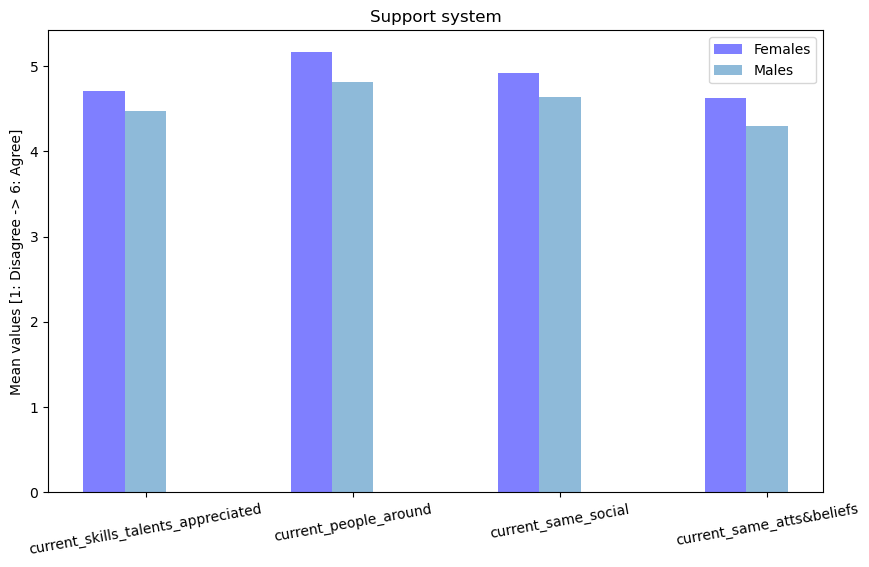

In [45]:
# --- Using facetgrid to divid data by gender for Expl_coping 1 for counts ----
# ------------------- Plotting the distribution of income stress by gender -----------------------
x = np.arange(4)
width = 0.2
plt.figure(figsize=(10, 6))
f_vs = gb[gb.index=='Female'].values.ravel()
m_vs = gb[gb.index=='Male'].values.ravel()

# you can change the following two lines for counts instead of percentage
plt.bar(x-0.2,f_vs , width, alpha=0.5, label="Females", color="blue")
plt.bar(x, m_vs, width, alpha=0.5, label="Males")

ax = plt.gca()
ax.set_xticks(x);ax.set_xticklabels(gb.columns)
plt.xticks(rotation = 10)

plt.ylabel("Mean values [1: Disagree -> 6: Agree]")
plt.title("Support system")
plt.legend()
plt.show()


In [46]:
nul = "The female and male col values are same"
# They are all statistically significant difference

# col = 'current_skills_talents_appreciated'

for col in ss_df.columns[1:]:
    print(col)
    v1 = df[df['Dem_gender'] == 'Male'][col].dropna()
    v2 = df[df['Dem_gender'] == 'Female'][col].dropna()
    stats_utils.two_sample_ttest(v1, v2)

#answer: low p value means that they are NOT same. Diffrent

current_skills_talents_appreciated
T-statistics:  -32.557336861102236
p-value:  3.336815236469959e-231
p-value < 0.05 True
current_people_around
T-statistics:  -51.79944123174391
p-value:  0.0
p-value < 0.05 True
current_same_social
T-statistics:  -33.81197404679077
p-value:  4.389791077069588e-249
p-value < 0.05 True
current_same_atts&beliefs
T-statistics:  -35.7170470665419
p-value:  1.6810125452920013e-277
p-value < 0.05 True


In [48]:
#------------------ sps = support system questions -----------------
#---------- for the support system, married/cohabiting were the ones with most support system rating 
#  for both females and males------

ss_df = df.loc[:,['Dem_gender', 'Dem_maritalstatus', 'current_skills_talents_appreciated', 'current_people_around', 'current_same_social',\
           'current_same_atts&beliefs']]
ss_df = ss_df[ss_df['Dem_gender'] != 'Other/would rather not say']
ss_df = ss_df[(ss_df['Dem_maritalstatus'] != 'Other or would rather not say') & (ss_df['Dem_maritalstatus'] != 'Uninformative response')]
gb = ss_df.groupby(['Dem_gender', 'Dem_maritalstatus']).mean()
gb

current_skills_talents_appreciated  \
Dem_gender Dem_maritalstatus                                        
Female     Divorced/widowed                              4.670286   
           Married/cohabiting                            4.805773   
           Single                                        4.563477   
Male       Divorced/widowed                              4.479835   
           Married/cohabiting                            4.607566   
           Single                                        4.292723   

                               current_people_around  current_same_social  \
Dem_gender Dem_maritalstatus                                                
Female     Divorced/widowed                 4.950815             4.836531   
           Married/cohabiting               5.312399             5.001923   
           Single                           4.961434             4.793434   
Male       Divorced/widowed                 4.621967             4.540050   
           Married/cohabiting               4.998637             4.730113   
           Single                           4.605562             4.542084   

                               current_same_atts&beliefs  
Dem_gender Dem_maritalstatus                              
Female     Divorced/widowed                     4.559050  
           Married/cohabiting                   4.729107  
           Single                               4.479606  
Male       Divorced/widowed                     4.182716  
           Married/cohabiting                   4.438774  
           Single                               4.134150

In [49]:
gb2 = gb.mean(axis=1)
gb2.iloc[gb2.index.get_level_values('Dem_gender') == "Female"]

Dem_gender  Dem_maritalstatus 
Female      Divorced/widowed      4.754170
            Married/cohabiting    4.962301
            Single                4.699487
dtype: float64

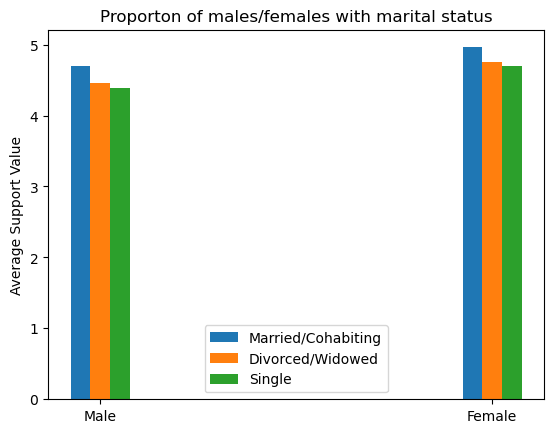

In [50]:
#----- plot for marital status support system ------
see_bar_labels = False
width = 0.05
labels = ['Male', 'Female']


def get_values(gb2, gender="Male"):
    gb3 = gb2.iloc[gb2.index.get_level_values('Dem_gender') == gender]
    dw = gb3.loc[:, "Divorced/widowed"][0]
    married = gb3.loc[:, "Married/cohabiting"][0]
    single = gb3.loc[:, "Single"][0]
    return married, dw, single

female_married, female_dw, female_single = get_values(gb2, gender="Female")
male_married, male_dw, male_single = get_values(gb2, gender="Male")

    
    
married = [male_married, female_married]
dw = [male_dw, female_dw]
single = [male_single, female_single]

x = np.arange(len(labels))  

f, ax = plt.subplots(1, 1)
rects1 = ax.bar(x - width, married, width, label='Married/Cohabiting')
rects2 = ax.bar(x, dw, width, label='Divorced/Widowed')
rects3 = ax.bar(x + width, single, width, label='Single')

ax.set_ylabel('Average Support Value')
ax.set_title('Proporton of males/females with marital status')
ax.set_xticks(x);ax.set_xticklabels(labels)
ax.legend()

if see_bar_labels:
    ax.bar_label(rects1, padding=3)
    ax.bar_label(rects2, padding=3)
    ax.bar_label(rects3, padding=3)
plt.show()

## Q4: Were the males and females most concerned about different groups of people? For example, were women more worried about their children's wellbeing or men? Is the difference significant enough?

In [51]:
cc = ['Dem_gender', 'Dem_maritalstatus', 'Corona_concerns_1', 'Corona_concerns_2', 'Corona_concerns_3', 'Corona_concerns_4', 'Corona_concerns_5']
concerns_data = orig_data[cc].rename(columns = {'Corona_concerns_1':'for yourself', 'Corona_concerns_2':
        'for your family', 'Corona_concerns_3':'for your close friends', 'Corona_concerns_4':'for your country',
        'Corona_concerns_5':'for all countries'})
concerns_data = concerns_data[concerns_data['Dem_gender']!= 'Other/would rather not say' ]
concerns_data = concerns_data[~concerns_data['Dem_maritalstatus'].isin(['Other or would rather not say', 'Uninformative response'])]

gb = concerns_data.groupby(['Dem_gender', 'Dem_maritalstatus']).mean()
gb


for yourself  for your family  \
Dem_gender Dem_maritalstatus                                   
Female     Divorced/widowed        4.293583         4.799802   
           Married/cohabiting      4.195180         4.854852   
           Single                  4.098899         4.974916   
Male       Divorced/widowed        4.010737         4.533671   
           Married/cohabiting      3.936827         4.591695   
           Single                  3.728599         4.709025   

                               for your close friends  for your country  \
Dem_gender Dem_maritalstatus                                              
Female     Divorced/widowed                  4.530506          4.893392   
           Married/cohabiting                4.464979          4.905078   
           Single                            4.538225          4.938879   
Male       Divorced/widowed                  4.288712          4.661115   
           Married/cohabiting                4.211263          4.620526   
           Single                            4.194821          4.638727   

                               for all countries  
Dem_gender Dem_maritalstatus                      
Female     Divorced/widowed             4.915237  
           Married/cohabiting           4.889864  
           Single                       4.907713  
Male       Divorced/widowed             4.716245  
           Married/cohabiting           4.683723  
           Single                       4.620938

In [52]:
import scipy
from scipy import stats

cc = ['Dem_gender', 'Dem_maritalstatus', 'Corona_concerns_1', 'Corona_concerns_2', 'Corona_concerns_3', 'Corona_concerns_4', 'Corona_concerns_5']
cd = orig_data[cc].rename(columns = {'Corona_concerns_1':'for yourself', 'Corona_concerns_2':
        'for your family', 'Corona_concerns_3':'for your close friends', 'Corona_concerns_4':'for your country',
        'Corona_concerns_5':'for all countries'})
#fy = <0.05, 'for your family' < 0.05, for your close friends < 0.05, country, 

a = concerns_data[concerns_data['Dem_gender'] == 'Male']['for all countries']
b = concerns_data[concerns_data['Dem_gender'] == 'Female']['for all countries']

_, p = scipy.stats.ttest_ind(a,b, nan_policy = 'omit')
p


6.601213187849302e-196

## Statistical Tests

In [ ]:
from scipy.stats import chi2_contingency
# ---- here, chi square test confirms that because p<0.05, expl_coping_7 is not independent of gender
chi2, p, dof, ex = chi2_contingency(pd.crosstab(index=orig_data['Dem_gender'], columns=orig_data['Expl_Coping_7']))
p

In [ ]:
df['Expl_Coping_7'].corr(df['Expl_Coping_8'])

## Doing Linear Regression

In [55]:
distress = df[ed].mean(axis=1)
columns_training = ['current_same_social', 'current_same_atts&beliefs', 'cc_yff', 'cc_countries','lw_bad_feelings', 'lw_good_feelings', 'current_people_around',
       'current_skills_talents_appreciated', 'Dem_gender', 'Dem_edu', 'Dem_employment',
       'Dem_maritalstatus', 'Dem_dependents']
training_data = df[columns_training]
training_data.loc[:, 'Dem_gender']=training_data.loc[:,'Dem_gender'].astype('category')
training_data.loc[:,'Dem_maritalstatus']=training_data.loc[:,'Dem_maritalstatus'].astype('category')
training_data.loc[:,'Dem_employment']=training_data.loc[:,'Dem_employment'].astype('category')
training_data.loc[:,'Dem_edu']=training_data.loc[:,'Dem_edu'].astype('category')

training_data.loc[:,'Dem_gender'] = training_data.loc[:,'Dem_gender'].cat.codes
training_data.loc[:,'Dem_maritalstatus'] = training_data.loc[:,'Dem_maritalstatus'].cat.codes
training_data.loc[:,'Dem_employment'] = training_data.loc[:,'Dem_employment'].cat.codes
training_data.loc[:,'Dem_edu'] = training_data.loc[:,'Dem_edu'].cat.codes
training_data = training_data.rename(columns = {'current_same_atts&beliefs':"same_atts"})

comb = pd.concat([training_data, distress], axis=1).rename(columns = {0: 'distress', 'current_same_atts&beliefs':"same_atts"})
comb.head()

/home/ai/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


current_same_social  same_atts    cc_yff  cc_countries  lw_bad_feelings  \
ID                                                                            
1                   NaN        NaN       NaN           NaN         3.500000   
2                   4.0        5.0  2.333333           4.5         2.166667   
4                   5.0        3.0  3.000000           NaN         3.833333   
5                   5.0        5.0  3.666667           6.0         2.750000   
6                   5.0        5.0  5.000000           5.0         2.166667   

    lw_good_feelings  current_people_around  \
ID                                            
1           4.000000                    NaN   
2           3.750000               5.333333   
4           2.750000               4.000000   
5           3.333333               5.166667   
6           4.000000               5.000000   

    current_skills_talents_appreciated  Dem_gender  Dem_edu  Dem_employment  \
ID                                                                            
1                                  NaN           0        0               1   
2                                  4.5           1        0               5   
4                                  3.5           1        0               1   
5                                  4.5           0        3               3   
6                                  5.0           1        0               3   

    Dem_maritalstatus  Dem_dependents  distress  
ID                                               
1                   3             0.0       NaN  
2                   3             0.0  3.777778  
4                   0             0.0  3.133333  
5                   1             0.0  4.818182  
6                   1             0.0  3.818182

Liner model
OLS Regression Results                            
==============================================================
Dep. Variable:               distress   R-squared:                       0.385
Model:                            OLS   Adj. R-squared:                  0.385
Method:                 Least Squares   F-statistic:                     3055.
Date:                Fri, 05 Aug 2022   Prob (F-statistic):               0.00
Time:                        10:29:45   Log-Likelihood:                -63900.
No. Observations:               63443   AIC:                         1.278e+05
Df Residuals:                   63429   BIC:                         1.280e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                              1.9964      0.029     68.343      0.000       1.939       2.054
current_same_social                    0.0020      0.003      0.629      0.529      -0.004       0.008
lw_bad_feelings                        0.3823      0.004     94.730      0.000       0.374       0.390
cc_yff                                 0.1804      0.003     66.912      0.000       0.175       0.186
cc_countries                           0.0404      0.003     14.064      0.000       0.035       0.046
same_atts                              0.0401      0.003     14.210      0.000       0.035       0.046
lw_good_feelings                      -0.1266      0.005    -27.420      0.000      -0.136      -0.118
current_people_around                 -0.0876      0.004    -20.525      0.000      -0.096      -0.079
current_skills_talents_appreciated     0.0204      0.004      5.584      0.000       0.013       0.028
Dem_gender                            -0.1184      0.006    -20.888      0.000      -0.130      -0.107
Dem_edu                                0.0065      0.001      4.669      0.000       0.004       0.009
Dem_employment                         0.0163      0.001     11.860      0.000       0.014       0.019
Dem_maritalstatus                      0.0297      0.003     10.973      0.000       0.024       0.035
Dem_dependents                         0.0124      0.002      6.331      0.000       0.009       0.016
==============================================================================
Omnibus:                      278.403   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              361.415
Skew:                           0.068   Prob(JB):                     3.31e-79
Kurtosis:                       3.344   Cond. No.                         145.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
RMSE 0.6624988641091103


In [81]:
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
import numpy as np
X_train, X_test, y_train, y_test = train_test_split(training_data, distress, test_size=0.3, random_state=42)
comb_x = pd.concat([X_train, y_train], axis=1).rename(columns = {0: 'distress'})

model = 'distress ~ current_same_social+lw_bad_feelings+cc_yff+cc_countries+same_atts+lw_good_feelings+ \
current_people_around+current_skills_talents_appreciated+ Dem_gender+Dem_edu+Dem_employment+\
Dem_maritalstatus+Dem_dependents'

# model = 'distress ~ current_same_social+ lw_bad_feelings+I(lw_bad_feelings**3)+cc_yff+cc_countries+same_atts+\
# lw_good_feelings+ +I(lw_good_feelings**3)+\
# current_people_around+current_skills_talents_appreciated+ Dem_gender+Dem_edu+Dem_employment+\
# Dem_maritalstatus+Dem_dependents'

lm1   = smf.ols(formula = model, data = comb_x).fit()
print(lm1.summary())
y_predicted = lm1.predict(X_train)
MSE = np.square(np.subtract(y_train,y_predicted)).mean() 

RMSE = math.sqrt(MSE)
print("RMSE", RMSE)

                            OLS Regression Results                            
Dep. Variable:               distress   R-squared:                       0.387
Model:                            OLS   Adj. R-squared:                  0.386
Method:                 Least Squares   F-statistic:                     2663.
Date:                Fri, 05 Aug 2022   Prob (F-statistic):               0.00
Time:                        11:21:21   Log-Likelihood:                -63673.
No. Observations:               63415   AIC:                         1.274e+05
Df Residuals:                   63399   BIC:                         1.275e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

In [57]:
y_predicted = lm1.predict(X_test)
MSE = np.square(np.subtract(y_test,y_predicted)).mean() 

RMSE = math.sqrt(MSE)
print("RMSE", RMSE)

RMSE 0.6684631269754803


In [78]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=15)
comb = comb.dropna()
distress = comb['distress']
training_data = comb.drop(['distress'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(training_data, distress, test_size=0.3, random_state=42)
# neigh.fit(training_data, distress)
# print(neigh.predict([[1.5]]))

In [79]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(neigh,training_data ,distress , cv=5,  scoring="neg_mean_squared_error")
# k=1: array([-0.88610525, -0.85131092, -0.85225718, -0.88546938, -0.873599  ])
# k=3: array([-0.5814653 , -0.56792559, -0.57108646, -0.60381204, -0.57591441])
# k=5: array([-0.52454327, -0.50927881, -0.51206047, -0.54581293, -0.52090253])
# k=6: array([-0.5091736 , -0.497322  , -0.4981497 , -0.53154761, -0.50850491])
# k=9: array([-0.48482506, -0.47603221, -0.47352503, -0.50757884, -0.4834379 ])
# k=15: array([-0.46804735, -0.4579113 , -0.45671432, -0.4926733 , -0.46512411])
scores

array([-0.46804735, -0.4579113 , -0.45671432, -0.4926733 , -0.46512411])

In [86]:
neigh = KNeighborsRegressor(n_neighbors=9)
comb = comb.dropna()
distress = comb['distress']
training_data = comb.drop(['distress'], axis=1)
neigh.fit(training_data, distress)
# print(neigh.predict([[1.5]]))

KNeighborsRegressor(n_neighbors=15)

In [87]:
y_predicted = neigh.predict(X_test)
MSE = np.square(np.subtract(y_test,y_predicted)).mean() 

RMSE = math.sqrt(MSE)
print("RMSE", RMSE)

RMSE 0.6358160752996359


In [133]:
from sklearn.svm import LinearSVR, SVC
from sklearn.preprocessing import StandardScaler
svm = LinearSVR()
ss = StandardScaler()
sy = StandardScaler()
training_data_sc = ss.fit_transform(training_data)
a = distress.values.ravel()
# dr = np.reshape(np.asarray(distress), (-1, 1))
distress_s = sy.fit_transform(a.reshape(-1, 1))
svm.fit(training_data_sc, distress_s)

# y_predicted = neigh.predict(ss.fit_transform(X_test))
# MSE = np.square(np.subtract(y_test,y_predicted)).mean() 

# RMSE = math.sqrt(MSE)
# print("RMSE", RMSE)

# y_pred = regressor.predict(6.5)
# y_pred = sc_y.inverse_transform(y_pred) 

/home/ai/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/ai/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVR()

In [134]:
distress_s

array([[ 0.35345168],
       [ 1.58576202],
       [ 0.40130839],
       ...,
       [ 0.61666359],
       [-1.47023089],
       [ 2.68945744]])

In [130]:
training_data_sc.shape


(90594, 13)

In [136]:
list(range(10,1,-1))

[10, 9, 8, 7, 6, 5, 4, 3, 2]